<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python
</h2>
</div>


# OBJECTIF DE CE NOTEBOOK

L'objectif de ce projet est de réaliser une analyse approfondie des ventes et du comportement des clients de la librairie en ligne Lapage à travers deux axes principaux :

    Analyse des indicateurs de vente : Cette analyse vise à offrir une vue d'ensemble des ventes et des performances commerciales de la librairie en ligne sur les deux dernières années. Nous allons observer l'évolution du chiffre d'affaires, le nombre de clients et de transactions, ainsi que les tendances des produits les plus vendus et ceux qui se vendent le moins.

    Analyse comportementale des clients : Le but est de mieux comprendre les comportements d'achat des clients en ligne, en identifiant des corrélations entre différents facteurs comme l'âge, le genre, les catégories de livres achetés, etc. Ces insights seront utiles pour comparer ces comportements avec ceux observés dans les librairies physiques.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des Bibliothèques et Fichiers</h2>
</div>
Dans cette section, nous allons importer les bibliothèques Python nécessaires (pandas, numpy, matplotlib, seaborn, etc.) et charger les fichiers de données contenant les informations sur les ventes et les clients.

In [59]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  # Import nécessaire pour les dates
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr 
from scipy.stats import f_oneway


# Affichage optimisé des graphiques
%matplotlib inline
sns.set(style="whitegrid")

# Chargement des fichiers CSV
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

# Affichage des premières lignes des jeux de données
print("Aperçu des données des clients :")
display(customers.head(20))

print("\nAperçu des données des produits :")
display(products.head(20))

print("\nAperçu des données des transactions :")
display(transactions.head(20))

Aperçu des données des clients :


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
5,c_415,m,1993
6,c_285,f,1967
7,c_160,f,1978
8,c_6446,m,1971
9,c_6866,m,1993



Aperçu des données des produits :


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0



Aperçu des données des transactions :


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Exploration Initiale et Vérification des Données</h2>
</div>
Aperçu des premières lignes des fichiers importés.
Vérification des types de données.
Recherche de valeurs manquantes ou anormales.
Validation des données afin d'assurer leur cohérence et intégrité.

In [60]:
# Vérification des informations générales pour chaque fichier

print("Informations sur les données des clients :")
display(customers.info())

print("\nInformations sur les données des produits :")
display(products.info())

print("\nInformations sur les données des transactions :")
display(transactions.info())

# Vérification des valeurs manquantes
print("\nValeurs manquantes dans les données des clients :")
display(customers.isnull().sum())

print("\nValeurs manquantes dans les données des produits :")
display(products.isnull().sum())

print("\nValeurs manquantes dans les données des transactions :")
display(transactions.isnull().sum())

# Statistiques descriptives pour comprendre les distributions (surtout pour les variables numériques)
print("\nStatistiques descriptives des données des clients :")
display(customers.describe())

print("\nStatistiques descriptives des données des produits :")
display(products.describe())

print("\nStatistiques descriptives des données des transactions :")
display(transactions.describe())


Informations sur les données des clients :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


None


Informations sur les données des produits :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


None


Informations sur les données des transactions :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


None


Valeurs manquantes dans les données des clients :


client_id    0
sex          0
birth        0
dtype: int64


Valeurs manquantes dans les données des produits :


id_prod    0
price      0
categ      0
dtype: int64


Valeurs manquantes dans les données des transactions :


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


Statistiques descriptives des données des clients :


,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000



Statistiques descriptives des données des produits :


,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000



Statistiques descriptives des données des transactions :


,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


Dans les Statistiques descriptives des données des produits :
Des "price" sont en négatif
Dans les Statistiques descriptives des données des transactions :
Problème de dates pas normalisée

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Nettoyage des Données</h2>
</div>
Traitement des valeurs manquantes : suppression ou imputation selon le contexte.
Conversion des types de données si nécessaire.
Détection et gestion des doublons.
Nettoyage des colonnes non pertinentes pour l'analyse.

In [61]:
# Exploration des produits avec un prix négatif
negative_prices = products[products['price'] < 0]
print(f"Nombre de produits avec un prix négatif : {len(negative_prices)}")
display(negative_prices)

Nombre de produits avec un prix négatif : 1


,id_prod,price,categ
731,T_0,-1.0,0


In [62]:
# Option 1 : Remplacer les prix négatifs par zéro (ou une autre valeur positive)
# products['price'] = products['price'].apply(lambda x: max(x, 0))

# Option 2 : Prendre la valeur absolue des prix (si le prix est positif mais incorrectement entré comme négatif)
# products['price'] = products['price'].abs()

# Option 3 : Supprimer les lignes avec des prix négatifs > Actuellement une ligne changeras pas l'analyse, mais le produit devras être vérifié
products = products[products['price'] >= 0]

negative_prices = products[products['price'] < 0]
print(f"Nombre de produits avec un prix négatif : {len(negative_prices)}")
display(negative_prices)

Nombre de produits avec un prix négatif : 0


,id_prod,price,categ


In [63]:
# Vérifier les valeurs manquantes dans le DataFrame transactions
print("Valeurs manquantes dans 'transactions' :")
print(transactions.isna().sum())


Valeurs manquantes dans 'transactions' :
id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [64]:
# Vérifier les valeurs manquantes dans le DataFrame customers
print("Valeurs manquantes dans 'customers' :")
print(customers.isna().sum())


Valeurs manquantes dans 'customers' :
client_id    0
sex          0
birth        0
dtype: int64


In [65]:
# Vérifier les valeurs manquantes dans le DataFrame products
print("Valeurs manquantes dans 'products' :")
print(products.isna().sum())


Valeurs manquantes dans 'products' :
id_prod    0
price      0
categ      0
dtype: int64


In [66]:
# Repérer les lignes où la date contient des caractères non valides (tout sauf les chiffres, "-", et ":" pour les heures)
invalid_dates = transactions[~transactions['date'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]
print(f"Nombre de lignes avec des dates invalides : {len(invalid_dates)}")
display(invalid_dates)

Nombre de lignes avec des dates invalides : 200


,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [67]:
# Filtrer les clients 'ct_0' et 'ct_1' dans la table customers
test_clients_info = customers[customers['client_id'].isin(['ct_0', 'ct_1'])]

print(f"Informations sur les clients 'ct_0' et 'ct_1' :")
display(test_clients_info)


Informations sur les clients 'ct_0' et 'ct_1' :


,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [68]:
# Compter le nombre de fois où session_id est égal à 's_0'
session_s_0_count = transactions['session_id'].value_counts().get('s_0', 0)
print(f"Nombre de transactions avec session_id égal à 's_0' : {session_s_0_count}")
# Compter le nombre de fois où id_product est égal à 'T_0'
id_prod_T_0_count = transactions['id_prod'].value_counts().get('T_0', 0)
print(f"Nombre de transactions avec id_product égal à 'T_0' : {id_prod_T_0_count}")

# Filtrer les produits avec id_prod égal à 'T_0'
product_T_0 = products[products['id_prod'] == 'T_0']

print("Détails du produit avec id_prod égal à 'T_0' :")
display(product_T_0)



Nombre de transactions avec session_id égal à 's_0' : 200
Nombre de transactions avec id_product égal à 'T_0' : 200
Détails du produit avec id_prod égal à 'T_0' :


,id_prod,price,categ


On cherche T_0 Associé a tout cela, il correspond a rien dans la catégorie des produits. ce qui confirme les essais

On as les client ct_0 et ct_0 a chaque fois dans la session s_0, je suppose qu'il s'agit d'un admin faisant des test, et je supprime les lignes de mon analyse

In [69]:
# Supprimer les lignes où client_id est 'ct_0' ou 'ct_1'
transactions_cleaned = transactions[~transactions['client_id'].isin(['ct_0', 'ct_1'])]

# Afficher le nombre de lignes avant et après suppression pour vérification
print(f"Nombre de transactions avant suppression : {len(transactions)}")
print(f"Nombre de transactions après suppression : {len(transactions_cleaned)}")


Nombre de transactions avant suppression : 679532
Nombre de transactions après suppression : 679332


In [70]:
# Supprimer les lignes où client_id est 'ct_0' ou 'ct_1'
customers_cleaned = customers[~customers['client_id'].isin(['ct_0', 'ct_1'])]

# Afficher le nombre de lignes avant et après suppression pour vérification
print(f"Nombre de clients avant suppression : {len(customers)}")
print(f"Nombre de clients après suppression : {len(customers_cleaned)}")


Nombre de clients avant suppression : 8623
Nombre de clients après suppression : 8621


On vois bien 200 lignes perdue dans les transactions (test) et 2 clients éffacé 
Retournons enfin aux dates, qui une fois corrigées nous fournirons 3 dataframes exploitables

In [71]:
# Extraire la partie YYYY-MM-DD uniquement (en gardant les 10 premiers caractères)
transactions['date'] = transactions['date'].str[:10]

# Vérifier les dates après conversion
print("Aperçu des dates après correction :")
display(transactions.head())


Aperçu des dates après correction :


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Jointures des Tables</h2>
</div>
Si les données proviennent de différentes sources (ex : ventes, clients), nous allons effectuer des jointures afin de créer une table centrale unifiée contenant toutes les informations nécessaires à l'analyse.

In [72]:
# Nombre de lignes avant la jointure
num_lignes_transactions = transactions.shape[0]
num_lignes_customers = customers.shape[0]
num_lignes_products = products.shape[0]

print(f"Nombre de lignes dans 'transactions' avant jointure : {num_lignes_transactions}")
print(f"Nombre de lignes dans 'customers' avant jointure : {num_lignes_customers}")
print(f"Nombre de lignes dans 'products' avant jointure : {num_lignes_products}")

# Jointure entre transactions et customers sur client_id
transactions_with_customers = pd.merge(transactions, customers, on='client_id', how='left')

# Nombre de lignes après la jointure avec customers
num_lignes_after_customer_join = transactions_with_customers.shape[0]
print(f"Nombre de lignes après jointure avec 'customers' : {num_lignes_after_customer_join}")

# Jointure entre le résultat précédent et products sur id_prod
transactions_with_products = pd.merge(transactions_with_customers, products, on='id_prod', how='left')

# Nombre de lignes après la jointure avec products
num_lignes_final = transactions_with_products.shape[0]
print(f"Nombre de lignes après jointure avec 'products' : {num_lignes_final}")


# Afficher les premières lignes du DataFrame résultant pour vérification
print("Aperçu des premières lignes après jointure :")
display(transactions_with_products.head())


Nombre de lignes dans 'transactions' avant jointure : 679532
Nombre de lignes dans 'customers' avant jointure : 8623
Nombre de lignes dans 'products' avant jointure : 3286
Nombre de lignes après jointure avec 'customers' : 679532
Nombre de lignes après jointure avec 'products' : 679532
Aperçu des premières lignes après jointure :


,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20,s_211425,c_103,f,1986,4.18,0.0
1,1_251,2022-02-02,s_158752,c_8534,m,1988,15.99,1.0
2,0_1277,2022-06-18,s_225667,c_6714,f,1968,7.99,0.0
3,2_209,2021-06-24,s_52962,c_6941,m,2000,69.99,2.0
4,0_1509,2023-01-11,s_325227,c_4232,m,1980,4.99,0.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse des Indicateurs de Vente</h2>
</div>
Dans cette section, nous répondrons au brief concernant les indicateurs de performance, avec des visualisations et des analyses statistiques.


<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
    5.1 Chiffre d'Affaires
  </h3>
  <p>Évolution du chiffre d'affaires dans le temps : Graphique du chiffre d'affaires avec une moyenne mobile (par jour, semaine, mois) pour lisser les fluctuations.</p>
</div>


Visuel par Jour


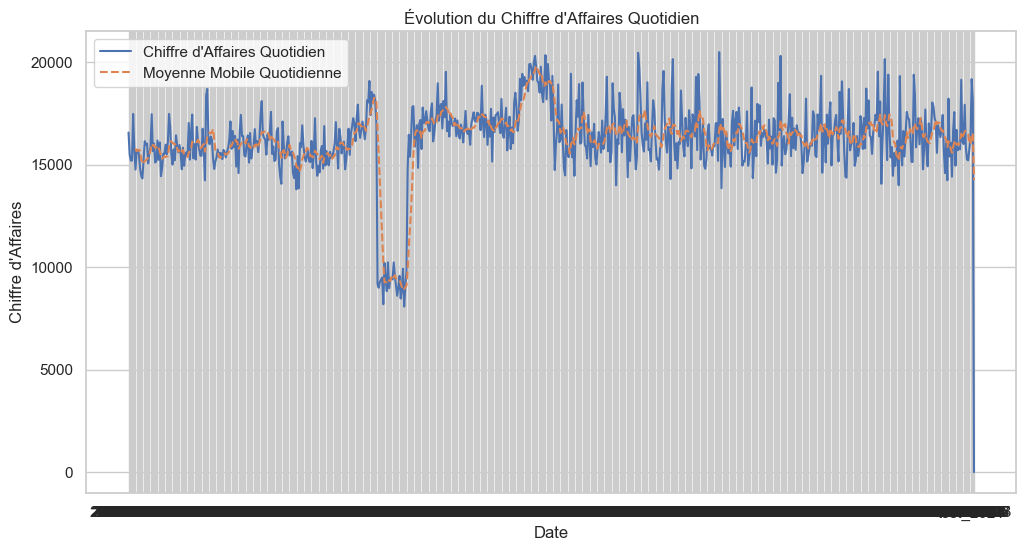

Visuel par Semaine


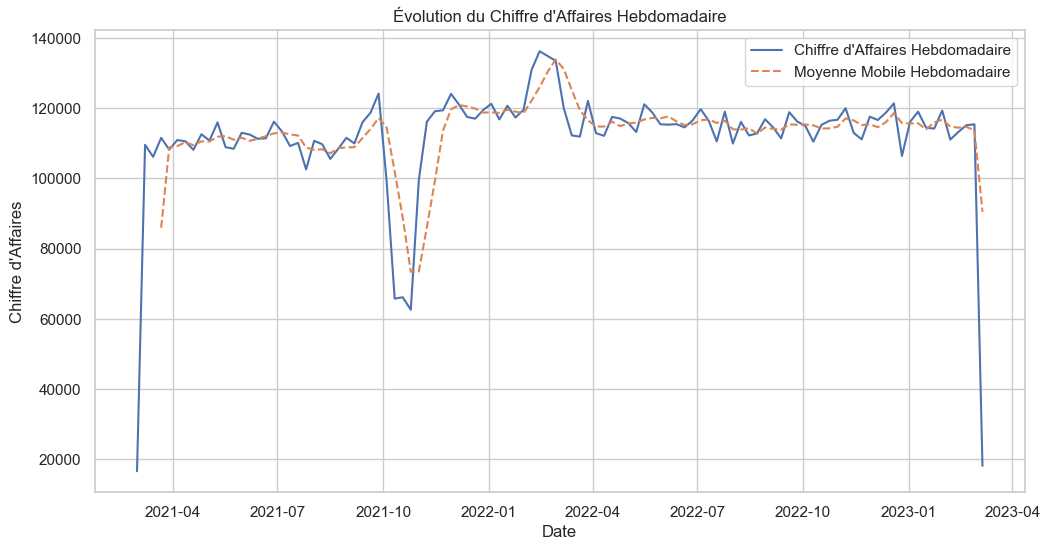

Visuel par Mois


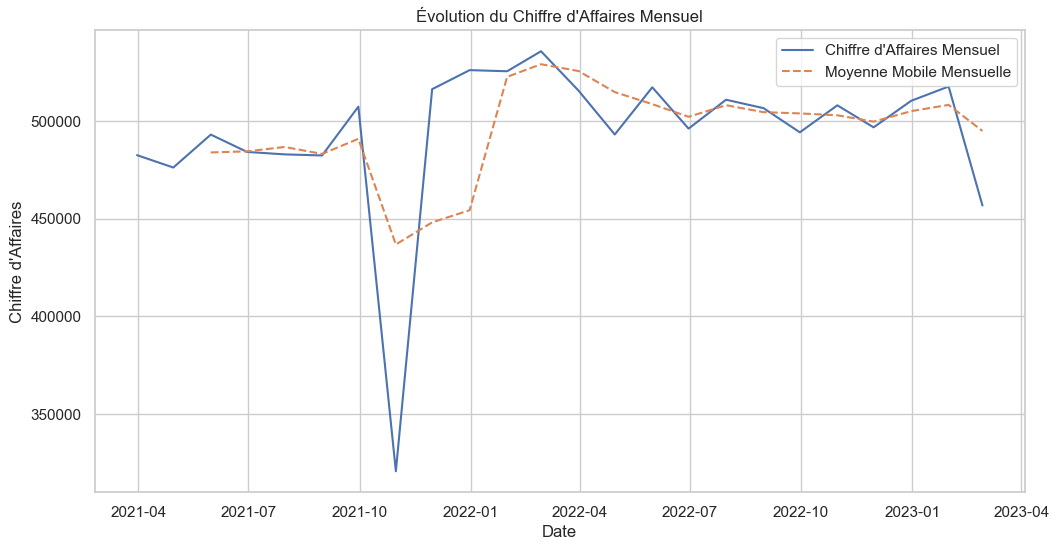

In [73]:

# Calculer le chiffre d'affaires pour chaque transaction
# Ici, on suppose que chaque ligne correspond à une unité vendue car pas de colonnes quantitée
transactions_with_products['chiffre_affaires'] = transactions_with_products['price']
# Calculer le CA total par jour
daily_ca = transactions_with_products.groupby('date')['chiffre_affaires'].sum().reset_index()

#  'date' est bien au format datetime
transactions_with_products['date'] = pd.to_datetime(transactions_with_products['date'], errors='coerce')


# Calculer la moyenne mobile par jour
daily_ca['moyenne_mobile'] = daily_ca['chiffre_affaires'].rolling(window=7).mean()  # Moyenne mobile sur 7 jours
# Calculer le CA total par semaine
weekly_ca = transactions_with_products.resample('W-Mon', on='date')['chiffre_affaires'].sum().reset_index()

# Calculer la moyenne mobile par semaine
weekly_ca['moyenne_mobile'] = weekly_ca['chiffre_affaires'].rolling(window=4).mean()  # Moyenne mobile sur 4 semaines
# Calculer le CA total par mois
monthly_ca = transactions_with_products.resample('M', on='date')['chiffre_affaires'].sum().reset_index()

# Calculer la moyenne mobile par mois
monthly_ca['moyenne_mobile'] = monthly_ca['chiffre_affaires'].rolling(window=3).mean()  # Moyenne mobile sur 3 mois


print ('Visuel par Jour')
plt.figure(figsize=(12, 6))
plt.plot(daily_ca['date'], daily_ca['chiffre_affaires'], label='Chiffre d\'Affaires Quotidien')
plt.plot(daily_ca['date'], daily_ca['moyenne_mobile'], label='Moyenne Mobile Quotidienne', linestyle='--')
plt.title('Évolution du Chiffre d\'Affaires Quotidien')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'Affaires')
plt.legend()
plt.grid(True)
plt.show()

print ('Visuel par Semaine')
plt.figure(figsize=(12, 6))
plt.plot(weekly_ca['date'], weekly_ca['chiffre_affaires'], label='Chiffre d\'Affaires Hebdomadaire')
plt.plot(weekly_ca['date'], weekly_ca['moyenne_mobile'], label='Moyenne Mobile Hebdomadaire', linestyle='--')
plt.title('Évolution du Chiffre d\'Affaires Hebdomadaire')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'Affaires')
plt.legend()
plt.grid(True)
plt.show()

print ('Visuel par Mois')
plt.figure(figsize=(12, 6))
plt.plot(monthly_ca['date'], monthly_ca['chiffre_affaires'], label='Chiffre d\'Affaires Mensuel')
plt.plot(monthly_ca['date'], monthly_ca['moyenne_mobile'], label='Moyenne Mobile Mensuelle', linestyle='--')
plt.title('Évolution du Chiffre d\'Affaires Mensuel')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'Affaires')
plt.legend()
plt.grid(True)
plt.show()



## Analyse de la chute des Ventes en Octobre 2021

En analysant les ventes des catégories 0.0, 1.0 et 2.0 pour le mois d'octobre 2021. 

On observe en Annexe 3 que la catégorie **1.0** n'enregistre quasiment pas de ventes durant ce mois. Cela peut indiquer plusieurs problèmes, tels qu'une récolte de données insuffisante, des problèmes d'approvisionnement ou d'autres facteurs qui pourraient expliquer cette chute significative dans les ventes

Il peut également s'agir d'un changement de stratégie, car on remarque après le mois d'octobre une augmentation du chifre d'affaire qui s'est stabilisé au dessus des 500k€ avant de légèrement redescendre

<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
    5.2 Chiffre d'affaires par Catégorie
  </h3>
  <p>Répartition du chiffre d'affaires par catégorie de livres : Analyse des catégories les plus et les moins performantes.</p>
</div>


In [74]:
# Calculer le chiffre d'affaires par catégorie
ca_par_categorie = transactions_with_products.groupby('categ')['price'].sum().reset_index()

# Renommer la colonne 'price' en 'chiffre_affaires' pour plus de clarté
ca_par_categorie = ca_par_categorie.rename(columns={'price': 'chiffre_affaires'})


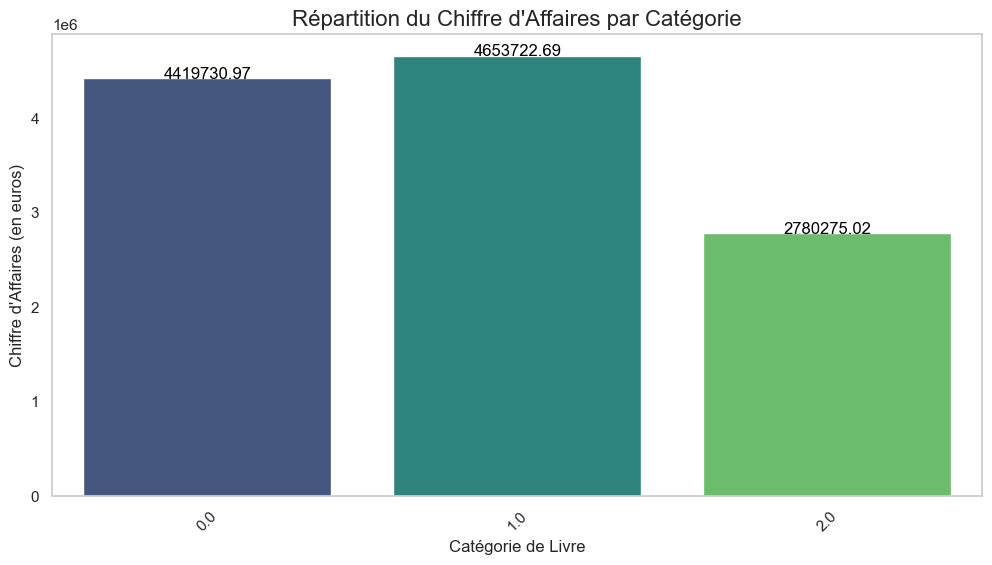

In [75]:
# Trier les catégories par chiffre d'affaires en ordre décroissant
ca_par_categorie = ca_par_categorie.sort_values(by='chiffre_affaires', ascending=False)

# Visualisation avec Seaborn pour un graphique plus soigné
plt.figure(figsize=(12, 6))
sns.barplot(x='categ', y='chiffre_affaires', data=ca_par_categorie, palette='viridis')

# Ajouter les valeurs exactes au-dessus des barres
for index, row in ca_par_categorie.iterrows():
    plt.text(row.name, row.chiffre_affaires + 500, round(row.chiffre_affaires, 2), ha='center', color='black')

# Titre et labels
plt.title('Répartition du Chiffre d\'Affaires par Catégorie', fontsize=16)
plt.xlabel('Catégorie de Livre', fontsize=12)
plt.ylabel('Chiffre d\'Affaires (en euros)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')


## Conclusion sur la Répartition du Chiffre d'Affaires par Catégorie

L'analyse de la répartition du chiffre d'affaires par catégorie met en évidence les points suivants :

- **Performances Similaires des Catégories 0.0 et 1.0** : Les catégories 0.0 et 1.0 affichent des chiffres d'affaires respectifs de **4,419k€** et **4,653k€**. Ces valeurs très proches indiquent une concurrence forte entre ces deux catégories, suggérant qu'elles pourraient bénéficier d'une stratégie marketing ciblée pour maximiser leur potentiel.

- **Chiffre d'Affaires de la Catégorie 2.0** : La catégorie 2.0, avec un chiffre d'affaires de **2,780k€**, est significativement inférieure à celles des catégories 0.0 et 1.0. Cela représente moins de la moitié de ce que génèrent les catégories 0.0 et 1.0, indiquant une opportunité d'amélioration pour cette catégorie. Une analyse approfondie des raisons derrière cette performance pourrait fournir des pistes pour stimuler les ventes.

En résumé, bien que les catégories 0.0 et 1.0 se disputent un chiffre d'affaires similaire et relativement élevé, la catégorie 2.0 doit être examinée de près afin de comprendre comment renforcer ses ventes et améliorer sa position sur le marché.



<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
    5.3 Nombre de Clients par Mois
  </h3>
  <p>Graphique montrant l'évolution du nombre de clients au cours du temps (par mois) pour observer la tendance et les pics éventuels.</p>
</div>

In [76]:
# Extraire l'année et le mois de la colonne 'date'
transactions_with_products['year_month'] = transactions_with_products['date'].dt.to_period('M')

# Compter le nombre de clients uniques par mois
clients_par_mois = transactions_with_products.groupby('year_month')['client_id'].nunique().reset_index()

# Renommer la colonne 'client_id' pour plus de clarté
clients_par_mois = clients_par_mois.rename(columns={'client_id': 'nombre_clients'})


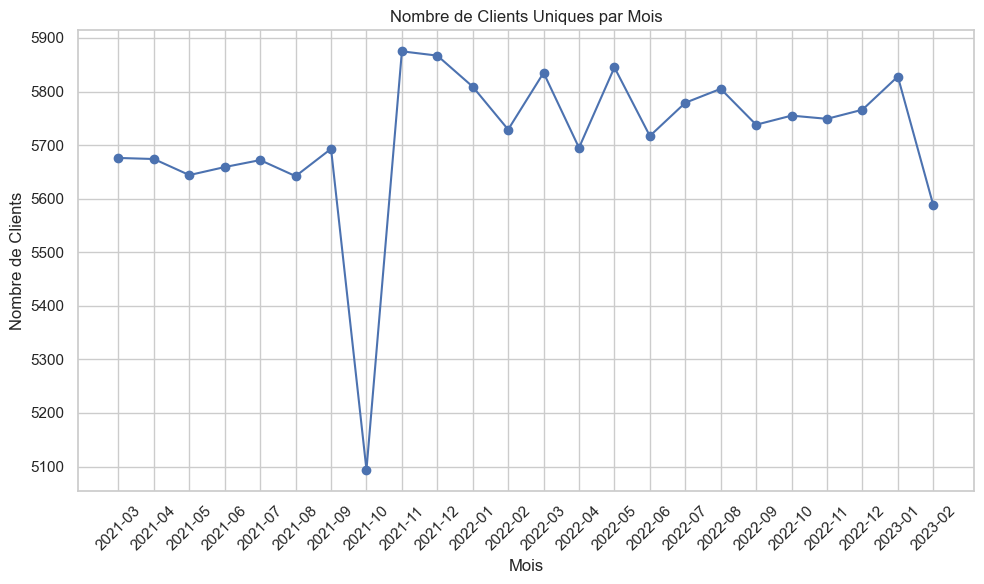

In [77]:
# Visualisation du nombre de clients par mois
plt.figure(figsize=(10, 6))
plt.plot(clients_par_mois['year_month'].astype(str), clients_par_mois['nombre_clients'], marker='o', color='b')
plt.title('Nombre de Clients Uniques par Mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


On retrouve des similaritée aux graphiques sur le chiffre d'affaire.

<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
   5.4 Nombre de Transactions et Produits Vendus
  </h3>
  <p>Nombre de transactions mensuelles : Évolution du nombre de transactions pour suivre l'activité.</p>
  <p>Nombre de produits vendus : Analyse du volume de produits écoulés sur une base mensuelle ou trimestrielle.</p>
</div>


In [78]:
# Extraire l'année et le mois de la colonne 'date'
transactions_with_products['year_month'] = transactions_with_products['date'].dt.to_period('M')

# Compter le nombre de transactions par mois (une transaction = un session_id unique)
transactions_par_mois = transactions_with_products.groupby(['year_month', 'session_id']).size().reset_index(name='transaction_count')
transactions_par_mois = transactions_par_mois.groupby('year_month')['session_id'].nunique().reset_index(name='nombre_transactions')

# Compter le nombre de produits vendus par mois (chaque ligne = 1 produit vendu)
produits_vendus_par_mois = transactions_with_products.groupby('year_month').size().reset_index(name='nombre_produits_vendus')


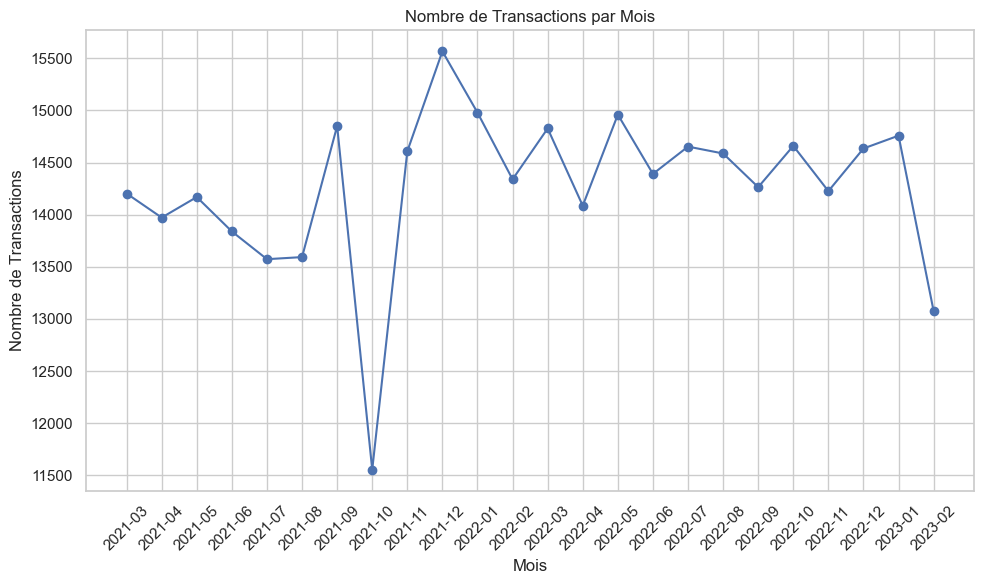

In [79]:
# Visualisation du nombre de transactions par mois
plt.figure(figsize=(10, 6))
plt.plot(transactions_par_mois['year_month'].astype(str), transactions_par_mois['nombre_transactions'], marker='o', color='b')
plt.title('Nombre de Transactions par Mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


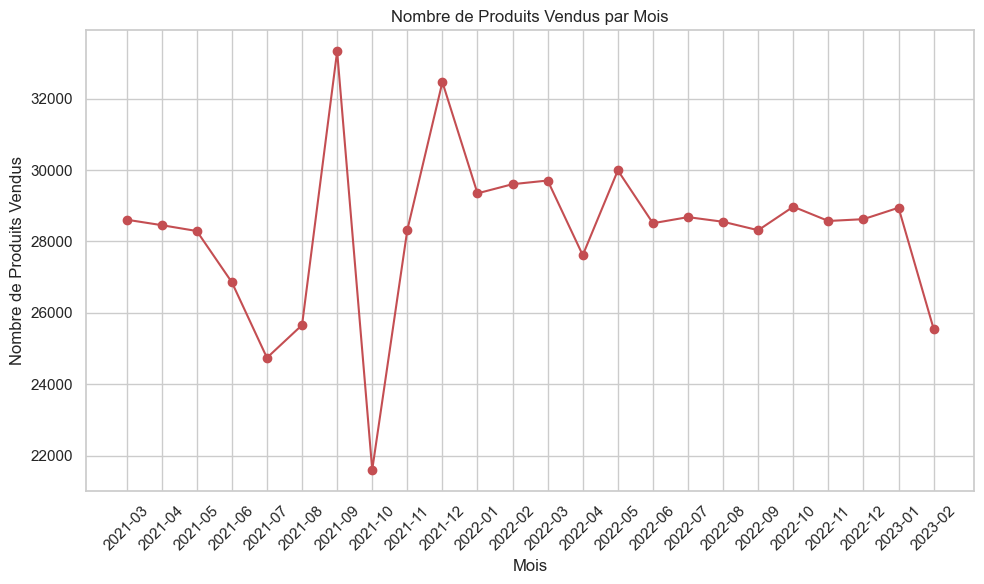

In [80]:
# Visualisation du nombre de produits vendus par mois
plt.figure(figsize=(10, 6))
plt.plot(produits_vendus_par_mois['year_month'].astype(str), produits_vendus_par_mois['nombre_produits_vendus'], marker='o', color='r')
plt.title('Nombre de Produits Vendus par Mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de Produits Vendus')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


En observant ces 2 graphiques, on remarque précédement au mois d'octobre, un grand pic d'achat. Des informations sur les stocks peuvent aider a l'analyse de cette tendance

<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
    5.5 Zoom sur les Références
  </h3>
  <p>Tops et Flops des Références : Identification des livres les plus vendus (tops) et ceux qui se vendent le moins (flops), avec une visualisation claire.</p>
  <p>Répartition des ventes par catégorie de livres : Visualisation des catégories les plus performantes en termes de volume de ventes.</p>
</div>

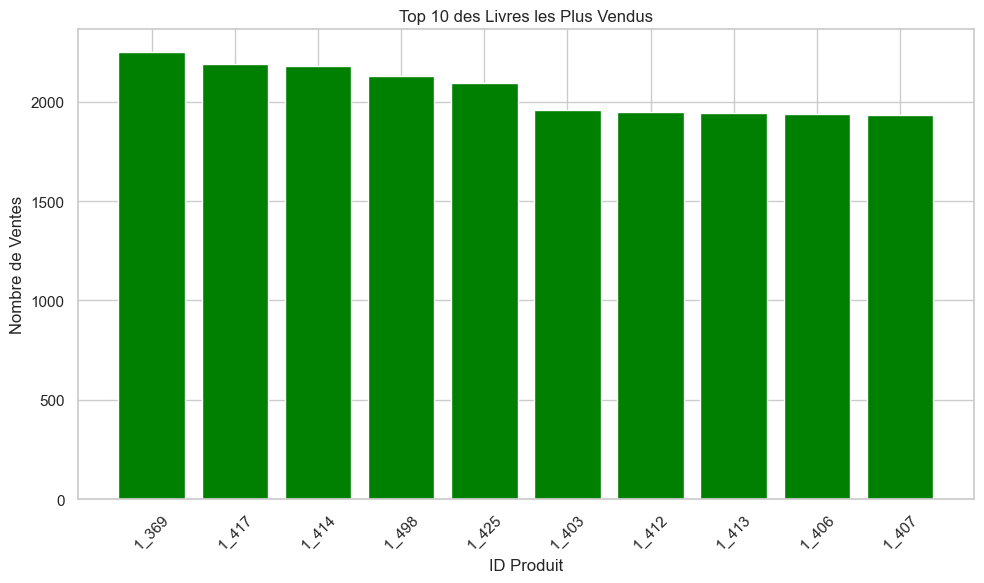

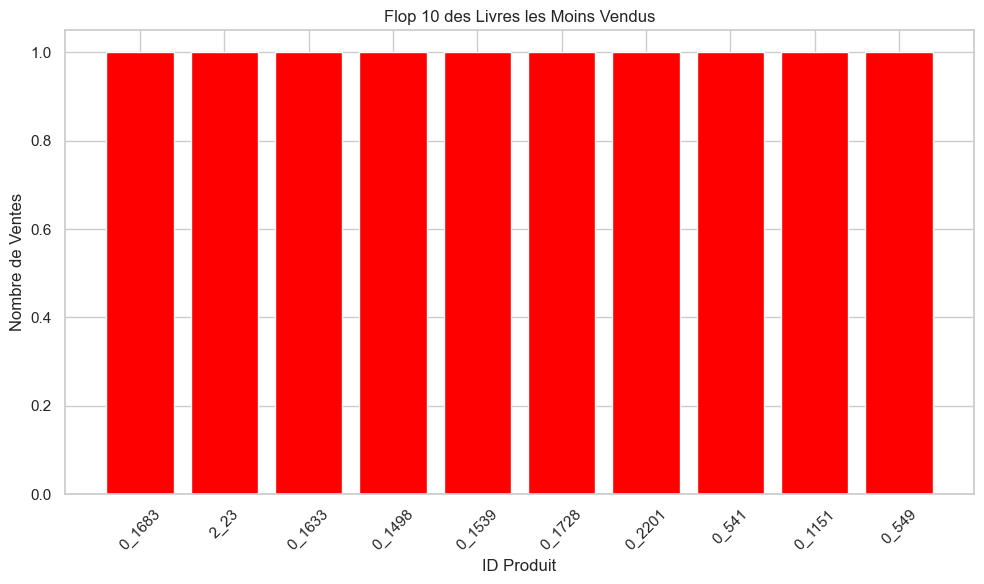

Top 10 des Livres les Plus Vendus:
     id_prod  nombre_ventes
2592   1_369           2252
2645   1_417           2189
2642   1_414           2180
2734   1_498           2128
2654   1_425           2096
2630   1_403           1960
2640   1_412           1951
2641   1_413           1945
2633   1_406           1939
2634   1_407           1935

Flop 10 des Livres les Moins Vendus:
     id_prod  nombre_ventes
752   0_1683              1
3176    2_23              1
698   0_1633              1
549   0_1498              1
595   0_1539              1
802   0_1728              1
1327  0_2201              1
1785   0_541              1
166   0_1151              1
1793   0_549              1

Liste des Produits Invendus (0 Ventes):
Empty DataFrame
Columns: [id_prod, nombre_ventes]
Index: []


In [81]:
# Comptage du nombre de ventes par produit (id_prod)
ventes_par_produit = transactions_with_products.groupby('id_prod').size().reset_index(name='nombre_ventes')

# Obtenir la liste complète des produits (à partir de la table des produits ou des transactions)
all_products = transactions_with_products['id_prod'].unique()

# Identifier les invendus (produits avec 0 vente)
# On recherche les produits qui ne sont pas dans la liste des ventes
invendus = set(all_products) - set(ventes_par_produit['id_prod'])

# Créer un DataFrame pour les invendus
invendus_df = pd.DataFrame(list(invendus), columns=['id_prod'])
invendus_df['nombre_ventes'] = 0

# Trier pour obtenir les Tops (les plus vendus) et Flops (les moins vendus)
tops = ventes_par_produit.sort_values(by='nombre_ventes', ascending=False).head(10)  # Top 10 des produits
flops = ventes_par_produit.sort_values(by='nombre_ventes', ascending=True).head(10)  # Flop 10 des produits

# Visualisation des Tops
plt.figure(figsize=(10, 6))
plt.bar(tops['id_prod'].astype(str), tops['nombre_ventes'], color='green')
plt.title('Top 10 des Livres les Plus Vendus')
plt.xlabel('ID Produit')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation des Flops
plt.figure(figsize=(10, 6))
plt.bar(flops['id_prod'].astype(str), flops['nombre_ventes'], color='red')
plt.title('Flop 10 des Livres les Moins Vendus')
plt.xlabel('ID Produit')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation des Invendus (si le nombre n'est pas trop grand)
if not invendus_df.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(invendus_df['id_prod'].astype(str), invendus_df['nombre_ventes'], color='gray')
    plt.title('Liste des Invendus (Produits avec 0 Vente)')
    plt.xlabel('ID Produit')
    plt.ylabel('Nombre de Ventes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Afficher les tables pour Tops, Flops, et Invendus
print("Top 10 des Livres les Plus Vendus:")
print(tops)

print("\nFlop 10 des Livres les Moins Vendus:")
print(flops)

print("\nListe des Produits Invendus (0 Ventes):")
print(invendus_df)


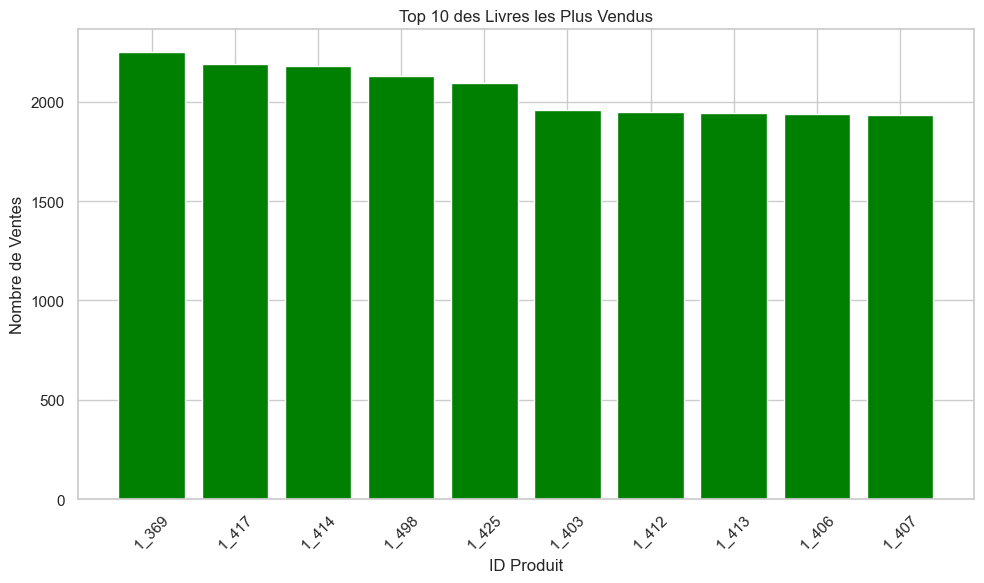

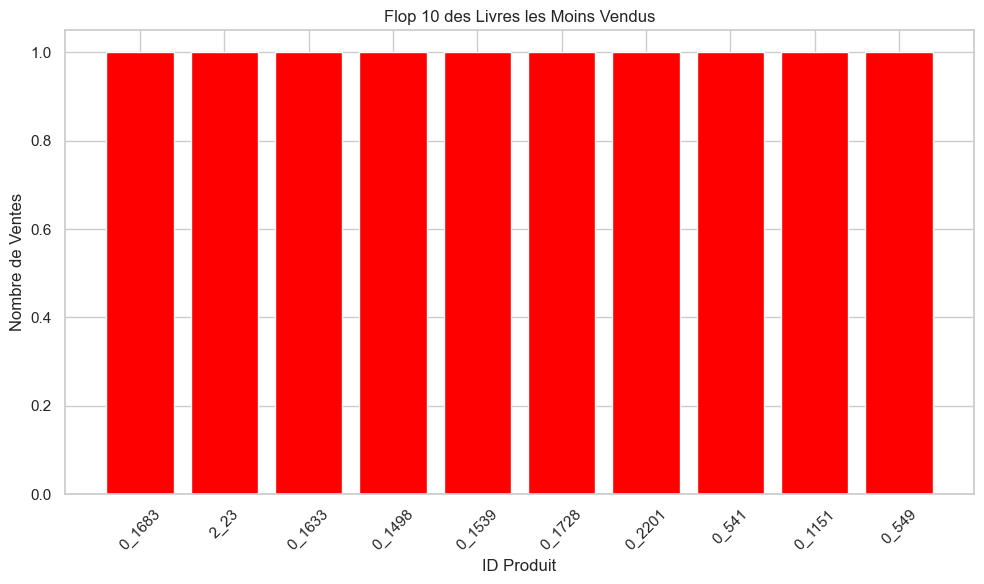

In [82]:
# Comptage du nombre de ventes par produit (id_prod)
ventes_par_produit = transactions_with_products.groupby('id_prod').size().reset_index(name='nombre_ventes')

# Trier pour obtenir les Tops (les plus vendus) et Flops (les moins vendus)
tops = ventes_par_produit.sort_values(by='nombre_ventes', ascending=False).head(10)  # Top 10 des produits
flops = ventes_par_produit.sort_values(by='nombre_ventes', ascending=True).head(10)  # Flop 10 des produits

# Visualisation des Tops
plt.figure(figsize=(10, 6))
plt.bar(tops['id_prod'].astype(str), tops['nombre_ventes'], color='green')
plt.title('Top 10 des Livres les Plus Vendus')
plt.xlabel('ID Produit')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation des Flops
plt.figure(figsize=(10, 6))
plt.bar(flops['id_prod'].astype(str), flops['nombre_ventes'], color='red')
plt.title('Flop 10 des Livres les Moins Vendus')
plt.xlabel('ID Produit')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [83]:
# Faire une jointure à gauche entre les produits et les transactions
produits_invendus = pd.merge(products, transactions[['id_prod']], on='id_prod', how='left', indicator=True)

# Filtrer pour ne garder que les produits qui ne sont pas dans transactions
invendus = produits_invendus[produits_invendus['_merge'] == 'left_only']

# Supprimer la colonne '_merge' (qui est ajoutée lors de la jointure avec 'indicator=True')
invendus = invendus.drop(columns=['_merge'])

# Afficher les invendus
print(f"Nombre de produits invendus (présents dans 'products' mais absents dans 'transactions') : {len(invendus)}")
display(invendus.head(21))

Nombre de produits invendus (présents dans 'products' mais absents dans 'transactions') : 21


,id_prod,price,categ
39705,0_1016,35.06,0
62805,0_1780,1.67,0
162765,0_1062,20.08,0
177522,0_1119,2.99,0
181172,0_1014,1.15,0
188021,1_0,31.82,1
230468,0_1318,20.92,0
253465,0_1800,22.05,0
290409,0_1645,2.99,0
320861,0_322,2.99,0


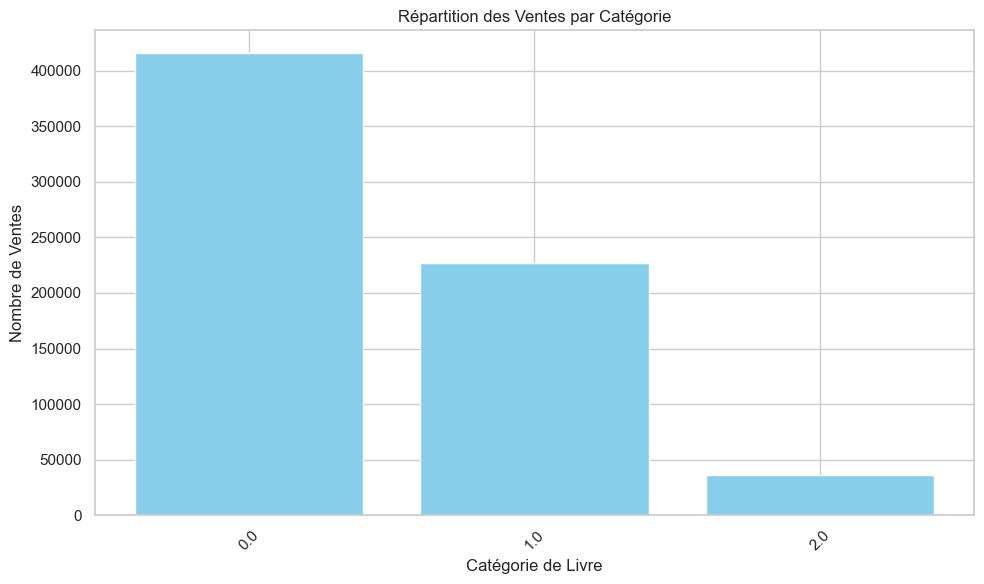

In [84]:
# Comptage du nombre de ventes par catégorie (categ)
ventes_par_categorie = transactions_with_products.groupby('categ').size().reset_index(name='nombre_ventes')

# Visualisation de la répartition des ventes par catégorie
plt.figure(figsize=(10, 6))
plt.bar(ventes_par_categorie['categ'].astype(str), ventes_par_categorie['nombre_ventes'], color='skyblue')
plt.title('Répartition des Ventes par Catégorie')
plt.xlabel('Catégorie de Livre')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


On peut voir en annexe 4 une comparaison entre les ventes et le chiffre d'affaire par catégorie. La différence de prix par catégorie est significative

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse Comportementale des Clients</h2>
</div>
Julie a demandé une analyse approfondie des comportements clients. Voici les corrélations à étudier :

<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
   6.1 Genre et Catégories de Livres Achetés
  </h3>
  <p>Analyse de la répartition des catégories de livres achetés en fonction du genre (homme, femme).</p>
</div>

**Hypothèse :**
- H₀ (Hypothèse nulle) : Il n'y a pas de différence significative dans la répartition des catégories de livres achetés entre hommes et femmes.
- H₁ (Hypothèse alternative) : Il existe une différence significative dans la répartition des catégories de livres achetés entre hommes et femmes.


**Type de Variables :**
- Genre : Variable qualitative (homme, femme).
- Catégories de livres : Variable qualitative (différentes catégories de livres).

**Test Statistique :** Le test du Chi² est utilisé pour évaluer s'il existe une relation significative entre le genre et les catégories de livres achetés.


In [85]:
# Remplacer 'm' par 'Homme' et 'f' par 'Femme' pour la lisibilité
transactions_with_products['sex'] = transactions_with_products['sex'].replace({'m': 'Homme', 'f': 'Femme'})

# Grouper les données par genre et catégorie de livre, et compter les ventes
ventes_par_genre_et_categorie = transactions_with_products.groupby(['sex', 'categ']).size().reset_index(name='nombre_ventes')

# Pivot pour faciliter la visualisation (genre en colonnes et catégories en lignes)
pivot_ventes = ventes_par_genre_et_categorie.pivot(index='categ', columns='sex', values='nombre_ventes').fillna(0)


In [86]:
# Grouper les données par genre et catégorie de livre, et compter les ventes
ventes_par_genre_et_categorie = transactions_with_products.groupby(['sex', 'categ']).size().reset_index(name='nombre_ventes')

# Pivot pour faciliter la visualisation (genre en colonnes et catégories en lignes)
pivot_ventes = ventes_par_genre_et_categorie.pivot(index='categ', columns='sex', values='nombre_ventes').fillna(0)


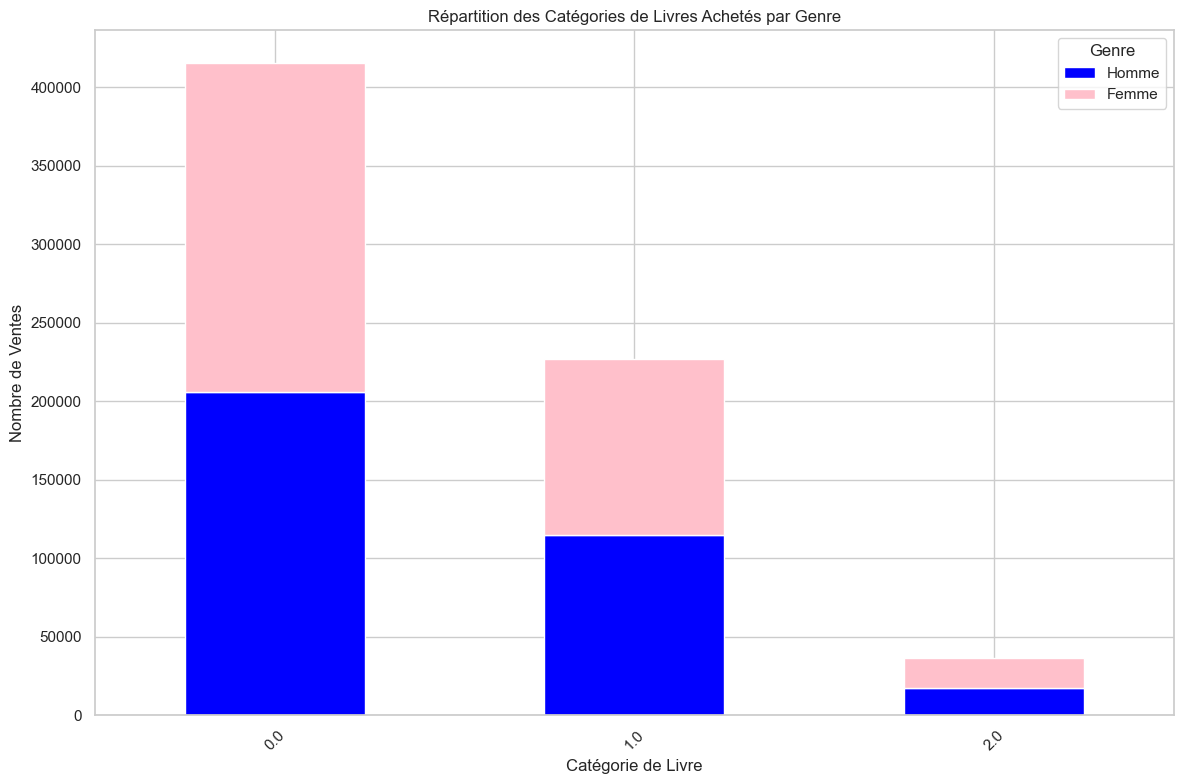

In [87]:
# Visualisation de la répartition des catégories de livres achetés par genre
pivot_ventes.plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'pink'])
plt.title('Répartition des Catégories de Livres Achetés par Genre')
plt.xlabel('Catégorie de Livre')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)
plt.legend(title='Genre', labels=['Homme', 'Femme'])
plt.tight_layout()
plt.show()


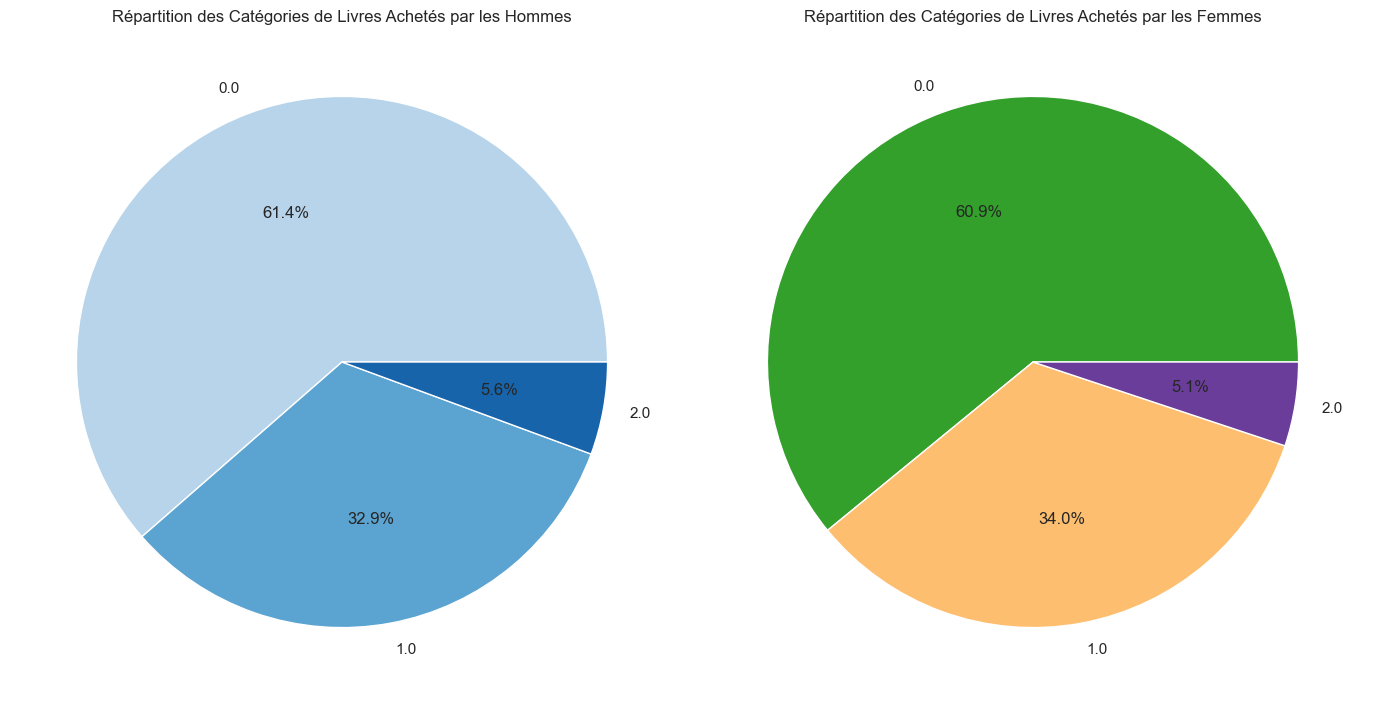

In [88]:

# Visualisation des parts de marché des catégories de livres pour chaque genre
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Diagramme circulaire pour les hommes
axes[0].pie(pivot_ventes['Homme'], labels=pivot_ventes.index, autopct='%1.1f%%', 
            colors=plt.cm.Blues(np.linspace(0.3, 0.8, len(pivot_ventes['Homme']))))
axes[0].set_title('Répartition des Catégories de Livres Achetés par les Hommes')

# Diagramme circulaire pour les femmes
axes[1].pie(pivot_ventes['Femme'], labels=pivot_ventes.index, autopct='%1.1f%%', 
            colors=plt.cm.Paired(np.linspace(0.3, 0.8, len(pivot_ventes['Femme']))))
axes[1].set_title('Répartition des Catégories de Livres Achetés par les Femmes')

plt.tight_layout()
plt.show()


Test du Chi² : Chi2 = 147.12, p-value = 0.0000, Degrés de liberté = 2

Table de contingence observée (ventes réelles) :
sex     Femme   Homme
categ                
0.0    206103  209356
1.0    114899  112270
2.0     17283   19200

Table de contingence attendue (selon l'hypothèse d'indépendance) :
sex            Femme          Homme
categ                              
0.0    206952.247593  208506.752407
1.0    113159.505832  114009.494168
2.0     18173.246575   18309.753425


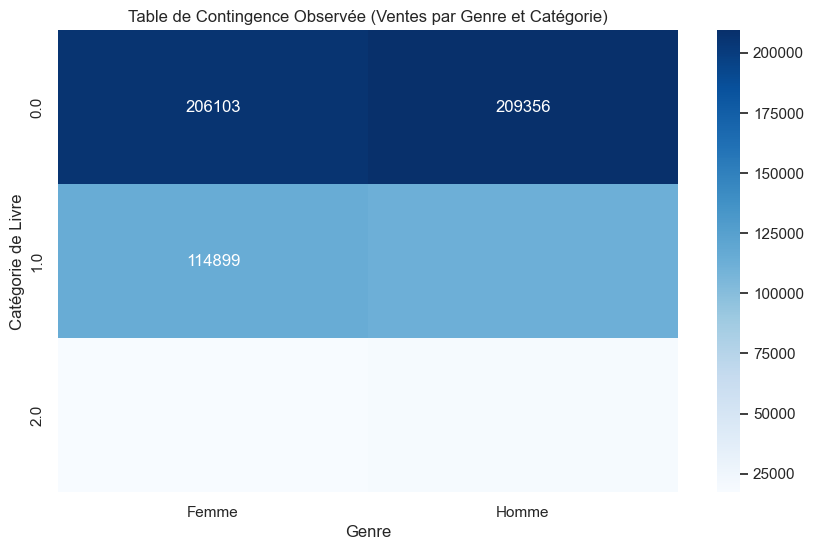

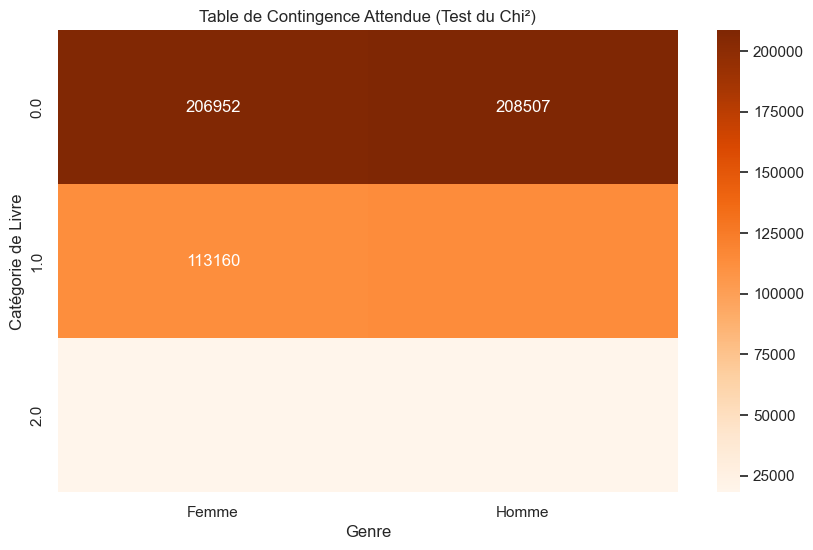

In [89]:
# Table de contingence pour le test du Chi²
contingency_table = pivot_ventes

# Appliquer le test du Chi²
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test Chi²
print(f"Test du Chi² : Chi2 = {chi2:.2f}, p-value = {p_value:.4f}, Degrés de liberté = {dof}")

# Afficher la table de contingence observée (ventes par genre et catégorie de livre)
print("\nTable de contingence observée (ventes réelles) :")
print(contingency_table)

# Créer un DataFrame pour la table attendue
expected_table = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Afficher la table de contingence attendue
print("\nTable de contingence attendue (selon l'hypothèse d'indépendance) :")
print(expected_table)

# Visualisation de la table observée (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt=".0f", cmap="Blues")
plt.title('Table de Contingence Observée (Ventes par Genre et Catégorie)')
plt.xlabel('Genre')
plt.ylabel('Catégorie de Livre')
plt.show()

# Visualisation de la table attendue (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(expected_table, annot=True, fmt=".0f", cmap="Oranges")
plt.title('Table de Contingence Attendue (Test du Chi²)')
plt.xlabel('Genre')
plt.ylabel('Catégorie de Livre')
plt.show()


**Résultat du Test du Chi² :**
- Statistique Chi² = 147.12
- p-value = 0.0000

Conclusion : Il existe une différence significative entre hommes et femmes dans la répartition des catégories de livres achetés. Nous rejetons donc l'hypothèse nulle.


<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
   6.2 Âge des Clients et Montant Total des Achats
  </h3>
  <p>Corrélation entre l'âge et le montant total dépensé : Visualisation et analyse de la relation entre l'âge des clients et leurs dépenses totales.</p>
</div>

**Hypothèse :**
- H₀ (Hypothèse nulle) : Il n'y a pas de corrélation significative entre l'âge des clients et le montant total dépensé.
- H₁ (Hypothèse alternative) : Il existe une corrélation significative entre l'âge des clients et le montant total dépensé.


**Type de Variables :**
- Âge : Variable quantitative (continue).
- Montant total dépensé : Variable quantitative (continue).

**Test Statistique :** Le coefficient de corrélation de Pearson est utilisé pour évaluer la force et la direction de la relation linéaire entre l'âge des clients et le montant total dépenssé


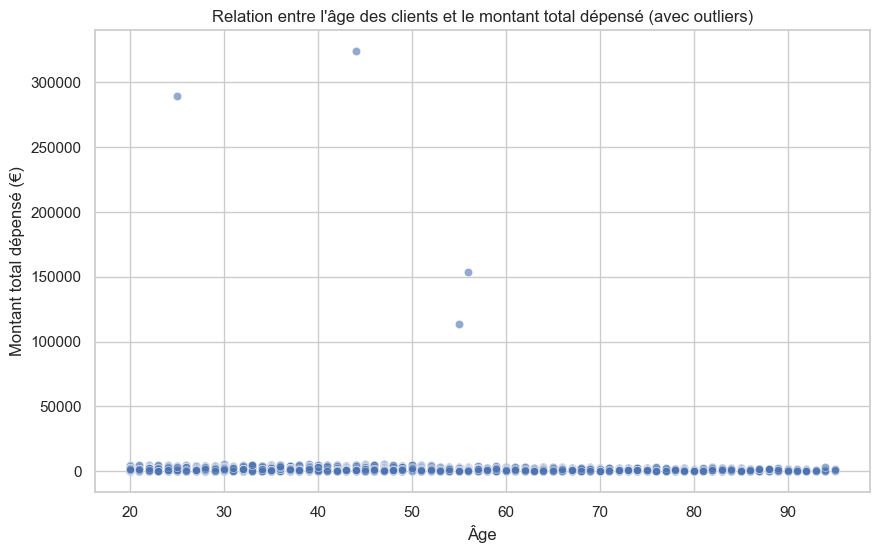

In [90]:
# Calculer l'âge en années
current_year = datetime.datetime.now().year
transactions_with_products['age'] = current_year - transactions_with_products['birth']

# Calculer le montant total dépensé par chaque client
montant_total_par_client = transactions_with_products.groupby('client_id')['price'].sum().reset_index(name='montant_total')

# Fusionner les données de montant total avec les données sur l'âge
df_age_montant = pd.merge(montant_total_par_client, transactions_with_products[['client_id', 'age']].drop_duplicates(), on='client_id')

# Définir un seuil pour détecter les outliers (95e percentile)
percentile_95 = df_age_montant['montant_total'].quantile(0.95)

# Filtrer les données pour exclure les outliers
df_sans_outliers = df_age_montant[df_age_montant['montant_total'] <= percentile_95]

# Premier graphique : Scatter plot avec les outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='montant_total', data=df_age_montant, alpha=0.6)
plt.title("Relation entre l'âge des clients et le montant total dépensé (avec outliers)")
plt.xlabel("Âge")
plt.ylabel("Montant total dépensé (€)")
plt.grid(True)
plt.show()

Il y as 4 outliers important dans l'analyse. des bibliothèques, centre de culture ou libraires. je les écarte pour continuer a analyser

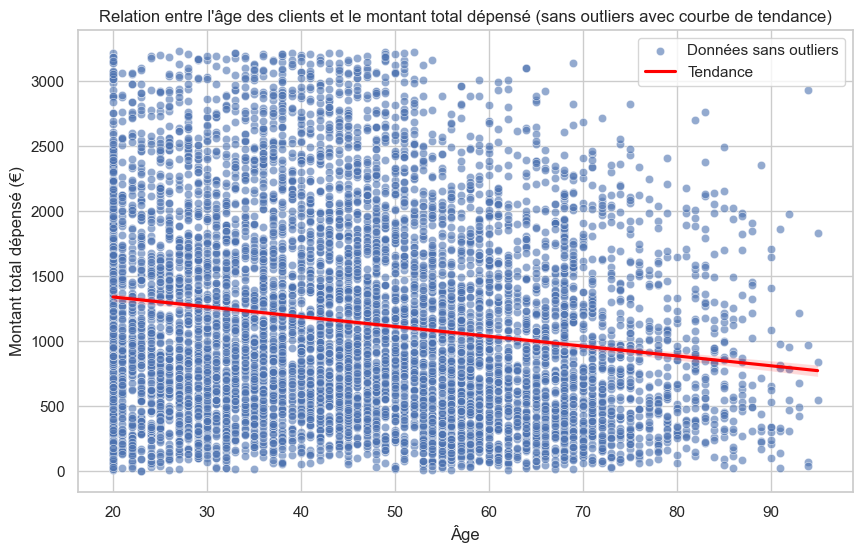

Corrélation de Pearson (avec outliers) : -0.04, p-value : 0.0002
Corrélation de Pearson (sans outliers) : -0.17, p-value : 0.0000


In [91]:
# Scatter plot sans les outliers + courbe de tendance (régression linéaire)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='montant_total', data=df_sans_outliers, alpha=0.6, label='Données sans outliers')

# Ajouter la courbe de tendance (régression linéaire)
sns.regplot(x='age', y='montant_total', data=df_sans_outliers, scatter=False, color='red', label='Tendance')

plt.title("Relation entre l'âge des clients et le montant total dépensé (sans outliers avec courbe de tendance)")
plt.xlabel("Âge")
plt.ylabel("Montant total dépensé (€)")
plt.legend()
plt.grid(True)
plt.show()

# Test de Pearson pour les données avec et sans outliers
correlation, p_value = pearsonr(df_age_montant['age'], df_age_montant['montant_total'])
correlation_sans_outliers, p_value_sans_outliers = pearsonr(df_sans_outliers['age'], df_sans_outliers['montant_total'])

# Afficher les résultats des tests de corrélation de Pearson
print(f"Corrélation de Pearson (avec outliers) : {correlation:.2f}, p-value : {p_value:.4f}")
print(f"Corrélation de Pearson (sans outliers) : {correlation_sans_outliers:.2f}, p-value : {p_value_sans_outliers:.4f}")


### Résultat et Conclusion

- **Avec outliers** : La corrélation de Pearson est de **-0.04** avec une **p-value de 0.0002**, indiquant une très faible relation négative entre l'âge et le montant dépensé, mais statistiquement significative.
  
- **Sans outliers** : La corrélation devient **-0.17** avec une **p-value de 0.0000**, montrant une relation négative plus forte sans les outliers.

**Conclusion** : Il existe une faible relation inverse entre l'âge des clients et leurs dépenses, qui devient plus prononcée lorsqu'on retire les outliers, mais reste globalement modeste.

### AUTRE VISUELS EN ANNEXE 1


<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
   6.3 Âge des Clients et Fréquence d'Achat
  </h3>
  <p>Analyse de la fréquence d'achat par âge : Graphique pour comprendre la fréquence d'achat selon les tranches d'âge.</p>
</div>

### Hypothèse
Nous formulons l'hypothèse suivante : **Il existe une différence significative dans la fréquence d'achat entre les différentes tranches d'âge des clients.**

### Type de Variables
- **Variables indépendantes** : Tranche d'âge (variable qualitative).
- **Variable dépendante** : Fréquence d'achat (variable quantitative).

### Test Statistique Associé
Pour tester cette hypothèse, nous utiliserons le test **ANOVA (Analyse de la Variance)**. Ce test est approprié car nous comparons les moyennes de plusieurs groupes (tranches d'âge) afin de déterminer s'il existe des différences significatives dans la fréquence d'achat.


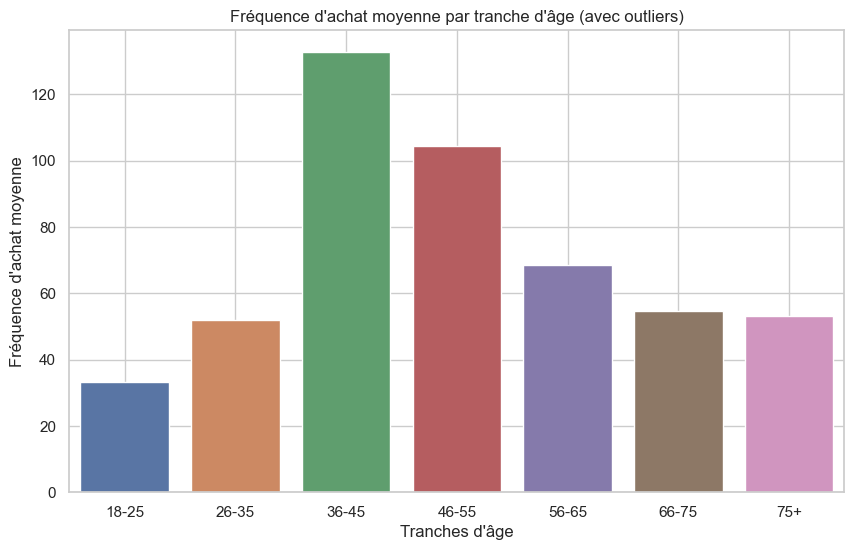

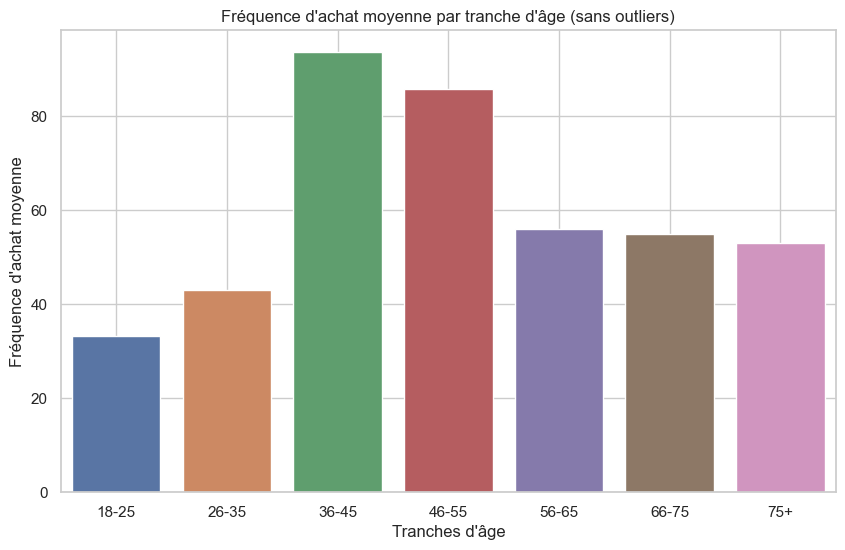

ANOVA avec outliers : F = 17.67, p-value = 0.0000
ANOVA sans outliers : F = 324.31, p-value = 0.0000


In [92]:

# Définir les tranches d'âge
bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']
transactions_with_products['age_group'] = pd.cut(transactions_with_products['age'], bins=bins, labels=labels, right=False)

# Calculer la fréquence d'achat par client
freq_achat = transactions_with_products.groupby('client_id').size().reset_index(name='frequency')

# Fusionner avec les informations d'âge et des tranches d'âge
freq_achat_age = pd.merge(freq_achat, transactions_with_products[['client_id', 'age_group']].drop_duplicates(), on='client_id')

# Calculer le 95e percentile pour identifier les outliers
percentile_95 = freq_achat_age['frequency'].quantile(0.95)

# Filtrer les outliers
freq_achat_age_cleaned = freq_achat_age[freq_achat_age['frequency'] <= percentile_95]

# Calculer la fréquence moyenne d'achat par tranche d'âge
freq_par_age = freq_achat_age.groupby('age_group')['frequency'].mean().reset_index()
freq_par_age_cleaned = freq_achat_age_cleaned.groupby('age_group')['frequency'].mean().reset_index()

# Visualisation de la fréquence d'achat par tranche d'âge avec outliers
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='frequency', data=freq_par_age)
plt.title("Fréquence d'achat moyenne par tranche d'âge (avec outliers)")
plt.xlabel("Tranches d'âge")
plt.ylabel("Fréquence d'achat moyenne")
plt.grid(True)
plt.show()

# Visualisation de la fréquence d'achat par tranche d'âge sans outliers
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='frequency', data=freq_par_age_cleaned)
plt.title("Fréquence d'achat moyenne par tranche d'âge (sans outliers)")
plt.xlabel("Tranches d'âge")
plt.ylabel("Fréquence d'achat moyenne")
plt.grid(True)
plt.show()

# ANOVA : Test si la fréquence d'achat diffère significativement entre les tranches d'âge (avec outliers)
anova_result_with_outliers = f_oneway(
    *[freq_achat_age[freq_achat_age['age_group'] == group]['frequency'] for group in labels]
)

print(f"ANOVA avec outliers : F = {anova_result_with_outliers.statistic:.2f}, p-value = {anova_result_with_outliers.pvalue:.4f}")

# ANOVA : Test si la fréquence d'achat diffère significativement entre les tranches d'âge (sans outliers)
anova_result_without_outliers = f_oneway(
    *[freq_achat_age_cleaned[freq_achat_age_cleaned['age_group'] == group]['frequency'] for group in labels]
)

print(f"ANOVA sans outliers : F = {anova_result_without_outliers.statistic:.2f}, p-value = {anova_result_without_outliers.pvalue:.4f}")


## Interprétation des Résultats de l'ANOVA

Les résultats de l'ANOVA sont les suivants :

- **ANOVA avec outliers** : F = 17.67, p-value = 0.0000
- **ANOVA sans outliers** : F = 324.31, p-value = 0.0000

### Interprétation

1. **ANOVA avec outliers** : Le score F de 17.67 indique une variance significativement plus élevée entre les groupes d'âge qu'à l'intérieur des groupes. La p-value (0.0000) est bien en dessous du seuil habituel de 0.05, ce qui signifie que nous rejetons l'hypothèse nulle et concluons qu'il existe des différences significatives dans la fréquence d'achat selon les tranches d'âge, même en présence d'outliers.

2. **ANOVA sans outliers** : Le score F de 324.31, également associé à une p-value de 0.0000, renforce cette conclusion. L'élimination des outliers a révélé une différence encore plus marquée entre les groupes d'âge, soulignant que les tranches d'âge influencent fortement la fréquence d'achat.

### Conclusion

Les analyses montrent qu'il existe une différence significative dans la fréquence d'achat entre les différentes tranches d'âge, que les outliers soient pris en compte ou non. Les jeunes clients achètent probablement plus fréquemment que les clients plus âgés, ce qui pourrait influencer les stratégies de marketing et de ciblage pour chaque tranche d'âge.



<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
   6.4 Âge des Clients et Taille du Panier Moyen
  </h3>
  <p>Corrélation entre l'âge des clients et la taille de leur panier moyen.</p>
</div>

## Hypothèse et Test Statistique

### Hypothèse

- **H0 (Hypothèse nulle)** : Il n'existe pas de corrélation significative entre l'âge des clients et la taille de leur panier moyen.
- **H1 (Hypothèse alternative)** : Il existe une corrélation significative entre l'âge des clients et la taille de leur panier moyen.

### Types de Variables

- **Âge des Clients** : Variable quantitative (âge réel des clients).
- **Taille du Panier Moyen** : Variable quantitative (montant des achats par client).

### Test Statistique Associé

Le test statistique approprié pour analyser la corrélation entre l'âge des clients et la taille de leur panier moyen est la **corrélation de Pearson**. Ce test permettra de déterminer si une relation linéaire existe entre ces deux variables quantitatives.



age             0
panier_total    0
dtype: int64


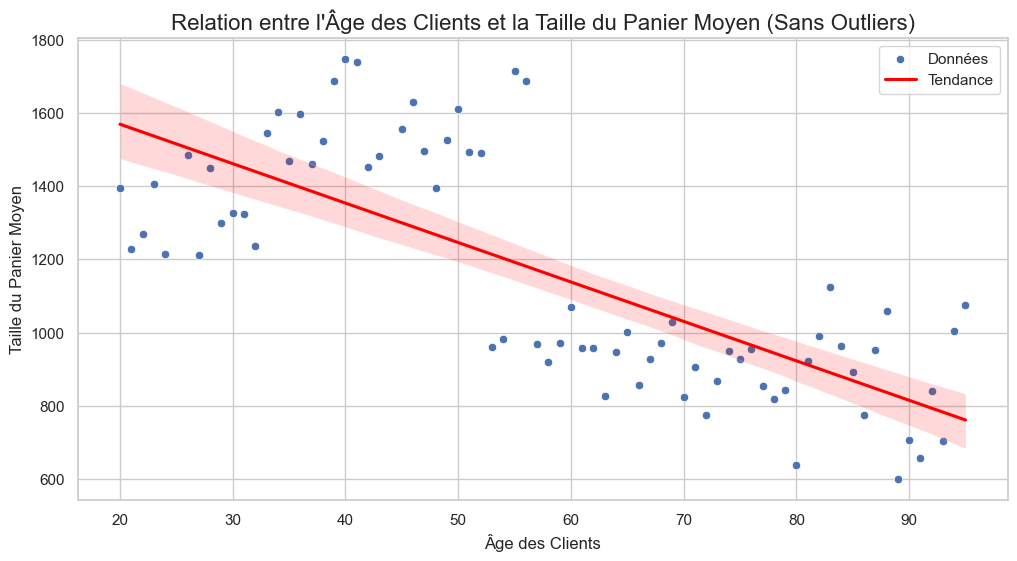

Corrélation de Pearson : -0.7434, p-value : 0.0000


In [93]:
# Vérifions que 'categ' est de type catégorie
transactions_with_products['categ'] = transactions_with_products['categ'].astype('str')

# Calculer le panier total par client
panier_moyen = transactions_with_products.groupby(['client_id'])['price'].sum().reset_index()

# Renommer la colonne 'price' en 'panier_total'
panier_moyen.rename(columns={'price': 'panier_total'}, inplace=True)

# Fusionner les données avec l'âge des clients
clients_age = transactions_with_products[['client_id', 'age']].drop_duplicates()  # Supposons que la colonne s'appelle 'age'
panier_moyen = panier_moyen.merge(clients_age, on='client_id', how='left')

# Calculer le panier moyen par âge
panier_moyen_par_age = panier_moyen.groupby('age')['panier_total'].mean().reset_index()

# Vérifier la présence de valeurs manquantes après la fusion
print(panier_moyen_par_age.isnull().sum())

# Identification des outliers dans le panier moyen par âge
Q1 = panier_moyen_par_age['panier_total'].quantile(0.25)
Q3 = panier_moyen_par_age['panier_total'].quantile(0.75)
IQR = Q3 - Q1

# Filtrer les outliers
panier_moyen_no_outliers = panier_moyen_par_age[
    (panier_moyen_par_age['panier_total'] >= (Q1 - 1.5 * IQR)) & (panier_moyen_par_age['panier_total'] <= (Q3 + 1.5 * IQR))
]

# Visualisation de la relation entre l'âge et la taille du panier moyen sans outliers avec une courbe de tendance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='panier_total', data=panier_moyen_no_outliers, label="Données")

# Ajouter une courbe de tendance (régression linéaire)
sns.regplot(x='age', y='panier_total', data=panier_moyen_no_outliers, scatter=False, color='red', label="Tendance")

# Titre et labels
plt.title("Relation entre l'Âge des Clients et la Taille du Panier Moyen (Sans Outliers)", fontsize=16)
plt.xlabel("Âge des Clients", fontsize=12)
plt.ylabel("Taille du Panier Moyen", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Calculer la corrélation de Pearson sans outliers
correlation, p_value = pearsonr(panier_moyen_no_outliers['age'].dropna(), panier_moyen_no_outliers['panier_total'].dropna())
print(f"Corrélation de Pearson : {correlation:.4f}, p-value : {p_value:.4f}")


## Interprétation des Résultats de la Corrélation de Pearson

Les résultats de la corrélation de Pearson entre l'âge des clients et la taille de leur panier moyen sont les suivants :
- **Corrélation : -0.7434**
- **p-value : 0.0000**

## Attention

La p-value étant inférieure à 0.05, nous pouvons rejeter l'hypothèse nulle. Cela indique qu'il existe une corrélation significative entre l'âge des clients et la taille de leur panier moyen. En d'autres termes, une augmentation de l'âge des clients est associée à une diminution de la taille de leur panier moyen.

## Conclusion sur la Corrélation Âge et Taille du Panier Moyen

L'analyse révèle une corrélation négative significative, suggérant que les clients plus âgés ont tendance à dépenser moins en moyenne pour leurs achats. Ce résultat souligne l'importance de considérer la relation entre l'âge et le comportement d'achat, et invite à explorer les raisons sous-jacentes à cette tendance.


### AUTRE VISUELS EN ANNEXE 2 

<div style="border: 1px solid RGB(0,150,250);" >
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">
   6.5 Âge des Clients et Catégories de Livres Achetés
  </h3>
  <p>Analyse de la répartition des catégories de livres achetés en fonction du genre (homme, femme).</p>
</div>

## Hypothèse
Il existe une différence significative dans la répartition des catégories de livres achetés en fonction du genre des clients (hommes vs femmes).

## Types de variables
- **Variable indépendante** : Genre des clients (homme, femme) - Variable qualitatives
- **Variable dépendante** : Catégories de livres achetés - Variable qualitatives

## Test associé
Un test du Chi² sera utilisé pour déterminer s'il existe une association significative entre le genre des clients et les catégories de livres achetés.


C:\Users\melch\AppData\Local\Temp\ipykernel_15816\148060509.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime("now").year


  categ    sex   count
0   0.0  Femme  200793
1   0.0  Homme  186488
2   1.0  Femme  111331
3   1.0  Homme  101017
4   2.0  Femme   16980
5   2.0  Homme   15868
6   nan  Femme     217
7   nan  Homme     195


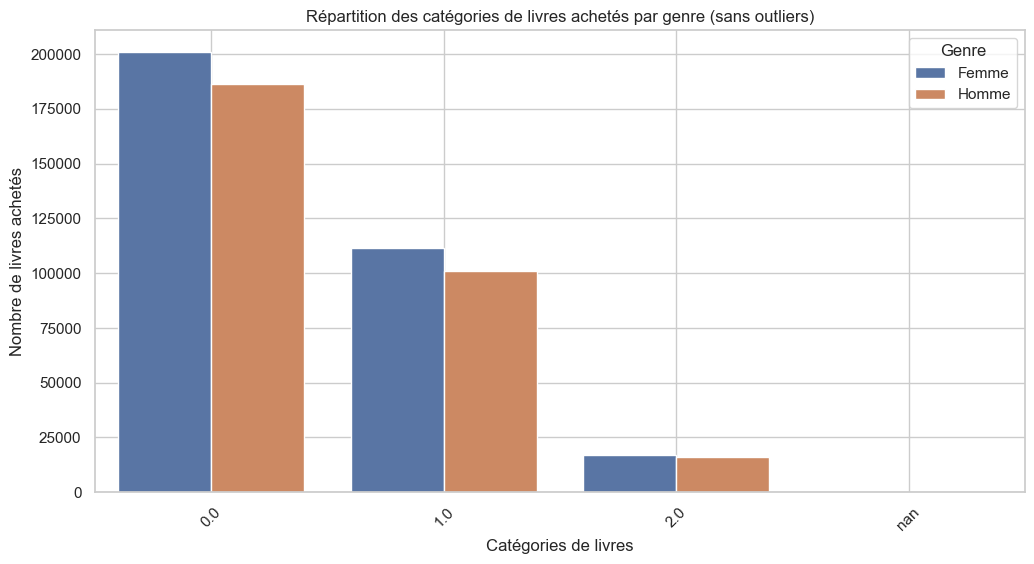

In [94]:
# Assurez-vous que 'categ' est de type catégorie
transactions_with_products['categ'] = transactions_with_products['categ'].astype('category')

# Calculer l'âge des clients
current_year = pd.to_datetime("now").year
transactions_with_products['age'] = current_year - transactions_with_products['birth']

# Filtrer les clients spécifiques à exclure
clients_to_exclude = ['c_1609', 'c_4958', 'c_6714', 'c_3454']
filtered_transactions = transactions_with_products[~transactions_with_products['client_id'].isin(clients_to_exclude)]

# Compter le nombre de livres achetés par genre et par catégorie
category_gender_counts = filtered_transactions.groupby(['categ', 'sex']).size().reset_index(name='count')

# Vérifier les données
print(category_gender_counts)

# Visualisation des catégories de livres achetés par genre
plt.figure(figsize=(12, 6))
sns.barplot(x='categ', y='count', hue='sex', data=category_gender_counts)
plt.title("Répartition des catégories de livres achetés par genre (sans outliers)")
plt.xlabel("Catégories de livres")
plt.ylabel("Nombre de livres achetés")
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [95]:
# Test du Chi-Carré
contingency_table = category_gender_counts.pivot_table(index='categ', columns='sex', values='count', fill_value=0)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Test du Chi-Carré : Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Test du Chi-Carré : Chi2 = 20.28, p-value = 0.0001


## Résultat du Test du Chi-Carré

Le test du Chi-Carré a été réalisé pour examiner l'association entre le genre des clients et les catégories de livres achetés. Les résultats sont les suivants :

- **Chi2** : 20.28
- **p-value** : 0.0001

### Interprétation
La valeur de Chi2 indique une association significative entre le genre et les catégories de livres achetés. Avec une p-value inférieure à 0.01, nous pouvons rejeter l'hypothèse nulle, ce qui suggère qu'il existe une dépendance entre le genre et les choix de catégories de livres. Autrement dit, le genre des clients influence les catégories de livres qu'ils achètent.



C:\Users\melch\AppData\Local\Temp\ipykernel_15816\3007961467.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime("now").year
C:\Users\melch\AppData\Local\Temp\ipykernel_15816\3007961467.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transactions['age_group'] = pd.cut(filtered_transactions['age'], bins=age_bins, labels=age_labels, right=False)


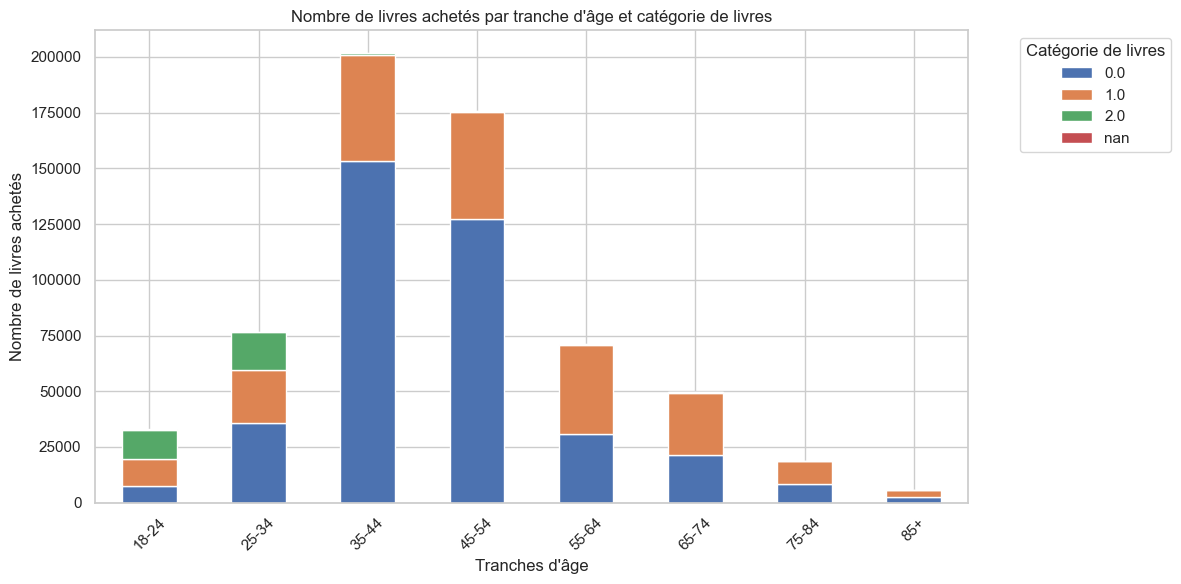

In [96]:
# Assurez-vous que 'categ' est de type catégorie
transactions_with_products['categ'] = transactions_with_products['categ'].astype('category')

# Calculer l'âge des clients
current_year = pd.to_datetime("now").year
transactions_with_products['age'] = current_year - transactions_with_products['birth']

# Filtrer les clients spécifiques à exclure
clients_to_exclude = ['c_1609', 'c_4958', 'c_6714', 'c_3454']
filtered_transactions = transactions_with_products[~transactions_with_products['client_id'].isin(clients_to_exclude)]

# Créer des groupes d'âge (par exemple, par tranche de 10 ans)
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
filtered_transactions['age_group'] = pd.cut(filtered_transactions['age'], bins=age_bins, labels=age_labels, right=False)

# Compter le nombre de livres achetés par groupe d'âge et par catégorie
category_age_counts = filtered_transactions.groupby(['age_group', 'categ']).size().unstack(fill_value=0)

# Visualisation des tranches d'âge en X, le nombre de livres en Y, et les catégories empilées
category_age_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Ajouter les titres et les labels
plt.title("Nombre de livres achetés par tranche d'âge et catégorie de livres")
plt.xlabel("Tranches d'âge")
plt.ylabel("Nombre de livres achetés")
plt.xticks(rotation=45)
plt.legend(title="Catégorie de livres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Table de contingence observée :
categ         0.0    1.0    2.0  nan
age_group                           
18-24        7431  12298  13040  205
25-34       35870  23756  16986   16
35-44      153421  47549    764   81
45-54      127292  47788    713   85
55-64       30944  39620    646   10
65-74       21495  27584    452    8
75-84        8172  10417    178    5
85+          2578   3214     68    2

Résultats du Test du Chi² :
Chi2 = 199479.15
p-value = 0.0000
Degrés de liberté = 21

Valeurs attendues (selon l'hypothèse d'indépendance) :
categ                0.0           1.0           2.0         nan
age_group                                                       
18-24       20179.980847  11060.649363   1711.897457   21.472334
25-34       46896.086988  25703.749602   3978.264035   49.899375
35-44      123510.124177  67695.910449  10477.545496  131.419878
45-54      107636.764462  58995.720526   9130.985045  114.529967
55-64       43586.408562  23889.714551   3697.499146   46.377741
6

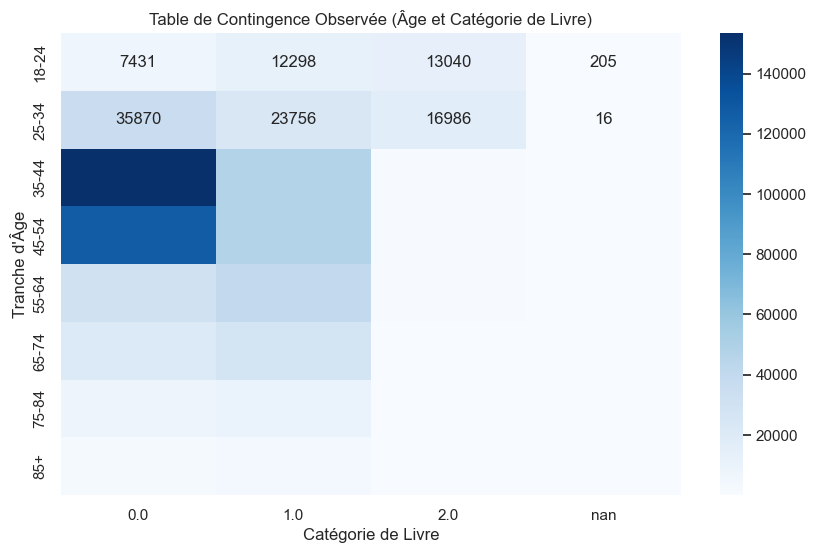

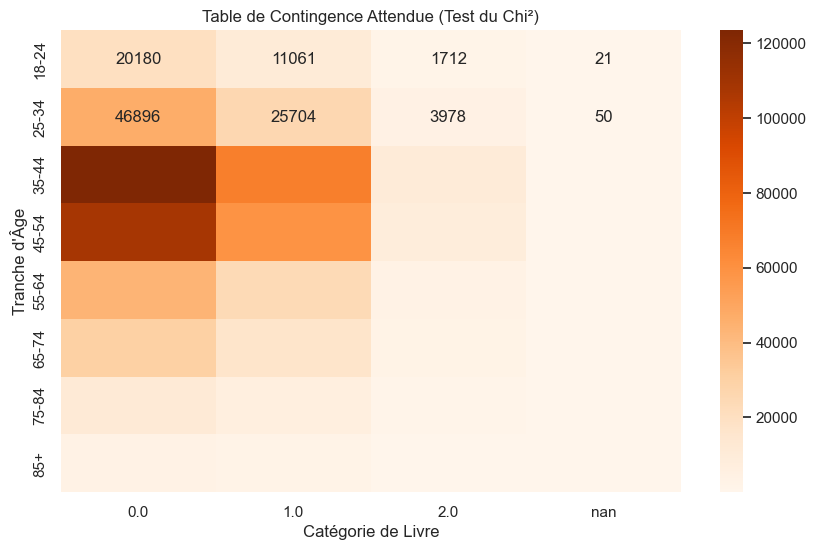

In [97]:

# Création du tableau de contingence entre 'age_group' et 'categ'
contingency_table = pd.crosstab(filtered_transactions['age_group'], filtered_transactions['categ'])

# Affichage du tableau de contingence observé
print("Table de contingence observée :")
print(contingency_table)

# Test du Chi-carré sur le tableau de contingence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats du test du Chi²
print(f"\nRésultats du Test du Chi² :")
print(f"Chi2 = {chi2:.2f}")
print(f"p-value = {p:.4f}")
print(f"Degrés de liberté = {dof}")

# Créer un DataFrame pour la table attendue
expected_table = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

# Affichage du tableau des valeurs attendues
print("\nValeurs attendues (selon l'hypothèse d'indépendance) :")
print(expected_table)

# Visualisation de la table de contingence observée (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt=".0f", cmap="Blues")
plt.title('Table de Contingence Observée (Âge et Catégorie de Livre)')
plt.xlabel('Catégorie de Livre')
plt.ylabel('Tranche d\'Âge')
plt.show()

# Visualisation de la table attendue (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(expected_table, annot=True, fmt=".0f", cmap="Oranges")
plt.title('Table de Contingence Attendue (Test du Chi²)')
plt.xlabel('Catégorie de Livre')
plt.ylabel('Tranche d\'Âge')
plt.show()


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Zoom sur les Clients BtoB</h2>
</div>
Répartition du chiffre d'affaires pour les clients BtoB : Analyse des clients professionnels et de leur contribution au chiffre d'affaires.

In [98]:

# Calculer le chiffre d'affaires par client
chiffre_affaires_clients = transactions_with_products.groupby('client_id')['price'].sum().reset_index()
chiffre_affaires_clients.rename(columns={'price': 'chiffre_affaires'}, inplace=True)

# Trier le dataframe par chiffre d'affaires, du plus grand au plus petit
chiffre_affaires_clients_sorted = chiffre_affaires_clients.sort_values(by='chiffre_affaires', ascending=False)

# Afficher les 10 premiers clients avec le plus grand chiffre d'affaires
print(chiffre_affaires_clients_sorted.head(10))


     client_id  chiffre_affaires
677     c_1609         324033.35
4388    c_4958         289760.34
6337    c_6714         153598.92
2724    c_3454         113637.93
2513    c_3263           5276.87
634     c_1570           5271.62
2108    c_2899           5214.05
1268    c_2140           5208.82
7006    c_7319           5155.77
7715    c_7959           5085.45


In [99]:
# Identifiants des clients BtoB
b2b_client_ids = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# Filtrer le dataframe pour ne garder que les clients BtoB
b2b_clients = chiffre_affaires_clients[chiffre_affaires_clients['client_id'].isin(b2b_client_ids)]

# Afficher le dataframe des clients BtoB
print(b2b_clients)


     client_id  chiffre_affaires
677     c_1609         324033.35
2724    c_3454         113637.93
4388    c_4958         289760.34
6337    c_6714         153598.92


In [100]:
# Créer une copie du DataFrame pour éviter les avertissements, ce soucis était pas grave, mais il m'embetais
b2b_clients_copy = b2b_clients.copy()

# Calculer le chiffre d'affaires total
total_chiffre_affaires = b2b_clients_copy['chiffre_affaires'].sum()
print(f"Chiffre d'affaires total des clients BtoB : {total_chiffre_affaires:.2f}")

# Pourcentage de chiffre d'affaires par client
b2b_clients_copy['pourcentage_chiffre_affaires'] = (b2b_clients_copy['chiffre_affaires'] / total_chiffre_affaires) * 100

# Afficher le chiffre d'affaires par client avec pourcentage
print(b2b_clients_copy[['client_id', 'chiffre_affaires', 'pourcentage_chiffre_affaires']])



Chiffre d'affaires total des clients BtoB : 881030.54
     client_id  chiffre_affaires  pourcentage_chiffre_affaires
677     c_1609         324033.35                     36.778901
2724    c_3454         113637.93                     12.898296
4388    c_4958         289760.34                     32.888796
6337    c_6714         153598.92                     17.434006


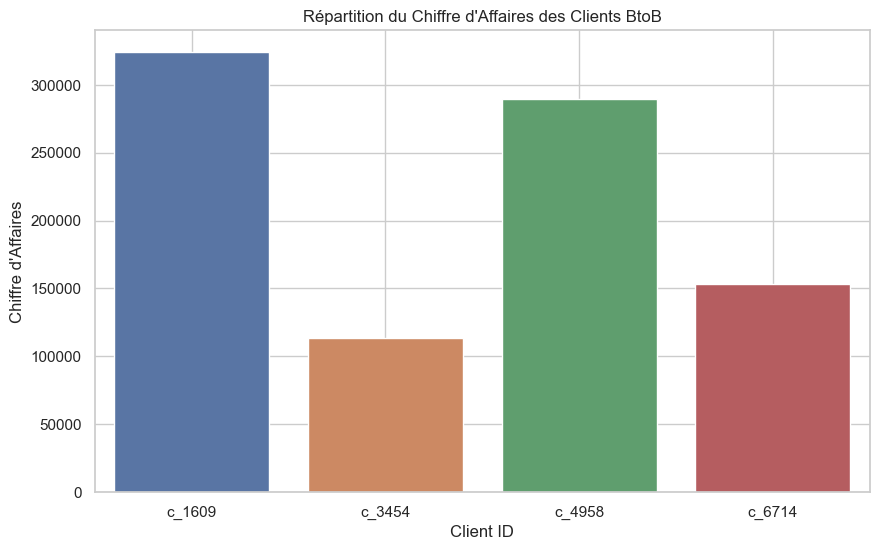

In [101]:
# Visualisation de la répartition du chiffre d'affaires des clients BtoB
plt.figure(figsize=(10, 6))
sns.barplot(x='client_id', y='chiffre_affaires', data=b2b_clients)
plt.title("Répartition du Chiffre d'Affaires des Clients BtoB")
plt.xlabel("Client ID")
plt.ylabel("Chiffre d'Affaires")
plt.grid(True)
plt.show()


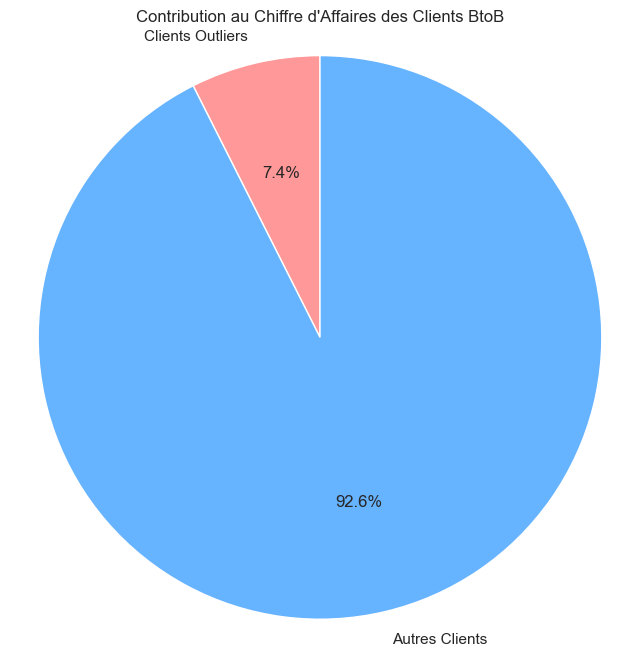

In [102]:
# Chiffre d'affaires des clients BtoB outliers
outliers_ca = b2b_clients_copy['chiffre_affaires'].sum()

# Chiffre d'affaires total des clients
total_ca = chiffre_affaires_clients['chiffre_affaires'].sum()

# Chiffre d'affaires des autres clients (hors outliers)
others_ca = total_ca - outliers_ca

# Données pour le pie chart
labels = ['Clients Outliers', 'Autres Clients']
sizes = [outliers_ca, others_ca]

# Visualisation
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Contribution au Chiffre d'Affaires des Clients BtoB")
plt.axis('equal')  # Pour un cercle
plt.show()


## Conclusion sur la Contribution des Clients BtoB

Les quatre clients BtoB (c_1609, c_4958, c_6714 et c_3454) génèrent **7.4%** du chiffre d'affaires total des ventes de livres, représentant une minorité parmi plus de **8000 clients**. 

Cette concentration indique une dépendance potentielle, ce qui pourrait poser un risque pour l'entreprise. il serait avisé de renforcer les relations avec ces clients clés pour garantir une stabilité financière, ou d'en trouver un peut plus.



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 8 - Courbe de Lorenz et Répartition des Ventes</h2>
</div>
Courbe de Lorenz : Analyse de la répartition des ventes pour voir si une part importante du chiffre d'affaires est générée par une minorité de clients (inégalité de répartition des ventes).

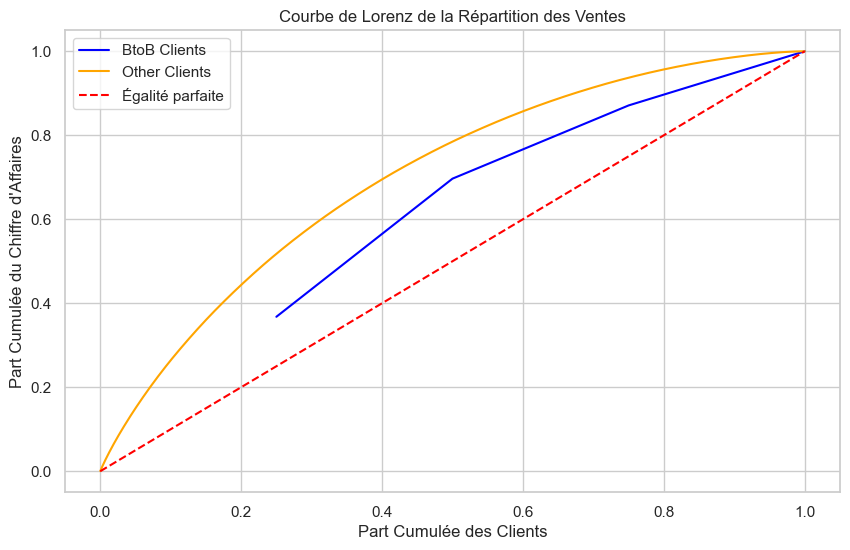

Indice de Gini : 0.4465


In [103]:
# Identifiants des clients BtoB
b2b_client_ids = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# Filtrer les clients BtoB et les autres
b2b_clients = chiffre_affaires_clients[chiffre_affaires_clients['client_id'].isin(b2b_client_ids)]
other_clients = chiffre_affaires_clients[~chiffre_affaires_clients['client_id'].isin(b2b_client_ids)]

# Étape 1 : Calculer le chiffre d'affaires cumulé par client
b2b_clients_sorted = b2b_clients.sort_values(by='chiffre_affaires', ascending=False)
b2b_clients_sorted['cumulative_ca'] = b2b_clients_sorted['chiffre_affaires'].cumsum()

other_clients_sorted = other_clients.sort_values(by='chiffre_affaires', ascending=False)
other_clients_sorted['cumulative_ca'] = other_clients_sorted['chiffre_affaires'].cumsum()

# Étape 2 : Calculer la part cumulée du chiffre d'affaires
total_b2b_ca = b2b_clients_sorted['chiffre_affaires'].sum()
total_other_ca = other_clients_sorted['chiffre_affaires'].sum()

b2b_clients_sorted['cumulative_share'] = b2b_clients_sorted['cumulative_ca'] / total_b2b_ca
other_clients_sorted['cumulative_share'] = other_clients_sorted['cumulative_ca'] / total_other_ca

# Étape 3 : Calculer la part cumulée du nombre de clients
b2b_clients_sorted['cumulative_clients'] = np.arange(1, len(b2b_clients_sorted) + 1) / len(b2b_clients_sorted)
other_clients_sorted['cumulative_clients'] = np.arange(1, len(other_clients_sorted) + 1) / len(other_clients_sorted)

# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(b2b_clients_sorted['cumulative_clients'], b2b_clients_sorted['cumulative_share'], label="BtoB Clients", color='blue')
plt.plot(other_clients_sorted['cumulative_clients'], other_clients_sorted['cumulative_share'], label="Other Clients", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Égalité parfaite")
plt.title("Courbe de Lorenz de la Répartition des Ventes")
plt.xlabel("Part Cumulée des Clients")
plt.ylabel("Part Cumulée du Chiffre d'Affaires")
plt.legend()
plt.grid(True)
plt.show()

# Combiner tous les clients pour calculer l'indice de Gini global
all_clients_sorted = pd.concat([b2b_clients_sorted, other_clients_sorted]).sort_values(by='chiffre_affaires', ascending=True)

# Étape 4 : Calculer l'indice de Gini
n = len(all_clients_sorted)  # Nombre total de clients
lorenz_curve = np.cumsum(all_clients_sorted['chiffre_affaires'].values) / all_clients_sorted['chiffre_affaires'].sum()  # Courbe de Lorenz
lorenz_curve = np.insert(lorenz_curve, 0, 0)  # Ajouter un point (0, 0) au début

# Gini index is 1 - twice the area under the Lorenz curve
gini_index = 1 - 2 * np.trapz(lorenz_curve, dx=1/n)
print(f"Indice de Gini : {gini_index:.4f}")


## Analyse de la Courbe de Lorenz

### Résultats
- **Courbe Bombée** : La courbe pour les clients BtoB et les autres clients est bombée vers le haut, indiquant qu'une majorité du chiffre d'affaires provient d'une minorité de clients.
- **Inégalité de Répartition** : Cette tendance montre une concentration significative des ventes, soulignant la dépendance sur quelques clients pour générer des revenus.
  
- Indice de Gini  : L'indice de Gini calculé est de 0.4465, ce qui confirme une inégalité modérée dans la répartition des ventes. Cela montre qu'environ 45 % du chiffre d'affaires est concentré chez une petite proportion de clients, ce qui traduit une dépendance partielle sur une minorité pour les revenus.
  
### Conclusion
L'analyse révèle une inégalité dans la répartition du chiffre d'affaires, suggérant la nécessité de diversifier la clientèle pour réduire les risques financiers associés à cette concentration. Des initiatives marketing ciblées pourraient aider à atteindre une clientèle plus large.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 9 - Conclusion et Recommandations</h2>
</div>
  <p>Synthèse des résultats : Résumé des observations importantes tirées de l'analyse des indicateurs de vente et du comportement des clients.</p>
  <p>Recommandations stratégiques basées sur l'analyse : segmentation des clients, ajustement des offres, optimisation des catégories de produits.</p>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 10 - Annexes</h2>
</div>
Graphiques ou analyses supplémentaires qui ne sont pas essentiels à la présentation finale mais qui peuvent offrir un éclairage intéressant.

**ANNEXE 1**

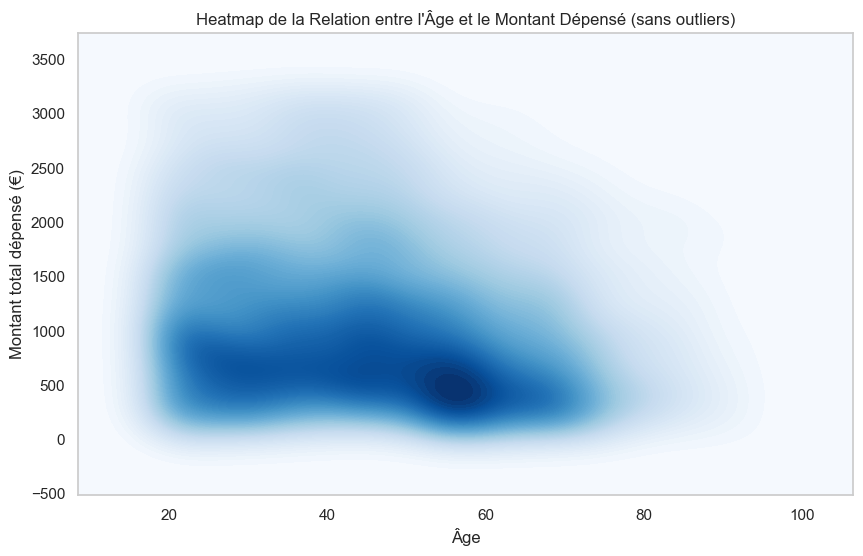

In [104]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_sans_outliers, x='age', y='montant_total', fill=True, cmap='Blues', thresh=0, levels=100)
plt.title("Heatmap de la Relation entre l'Âge et le Montant Dépensé (sans outliers)")
plt.xlabel("Âge")
plt.ylabel("Montant total dépensé (€)")
plt.grid(True)
plt.show()


**ANNEXE 2**

age_group       0
categ           0
panier_moyen    0
dtype: int64


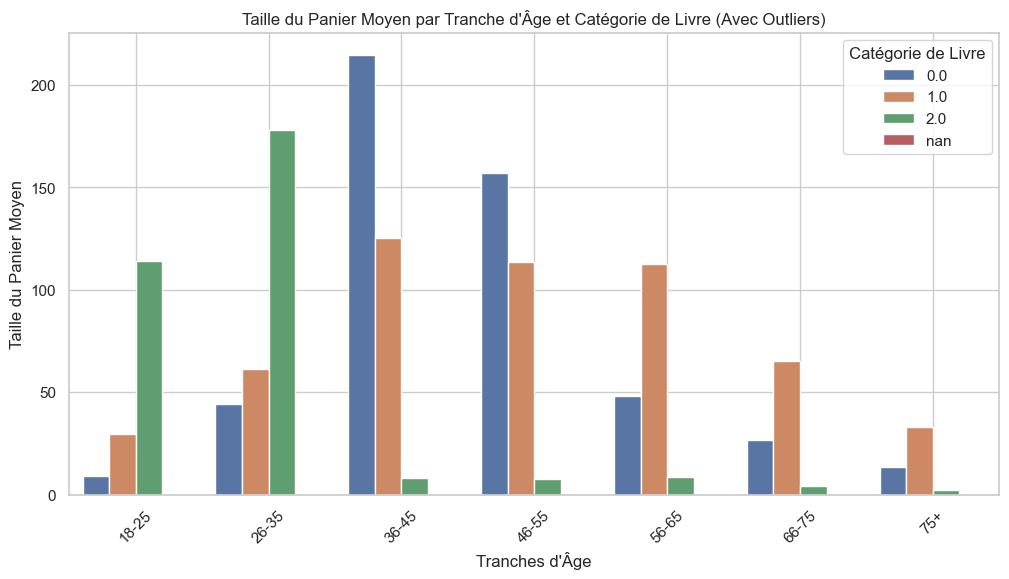

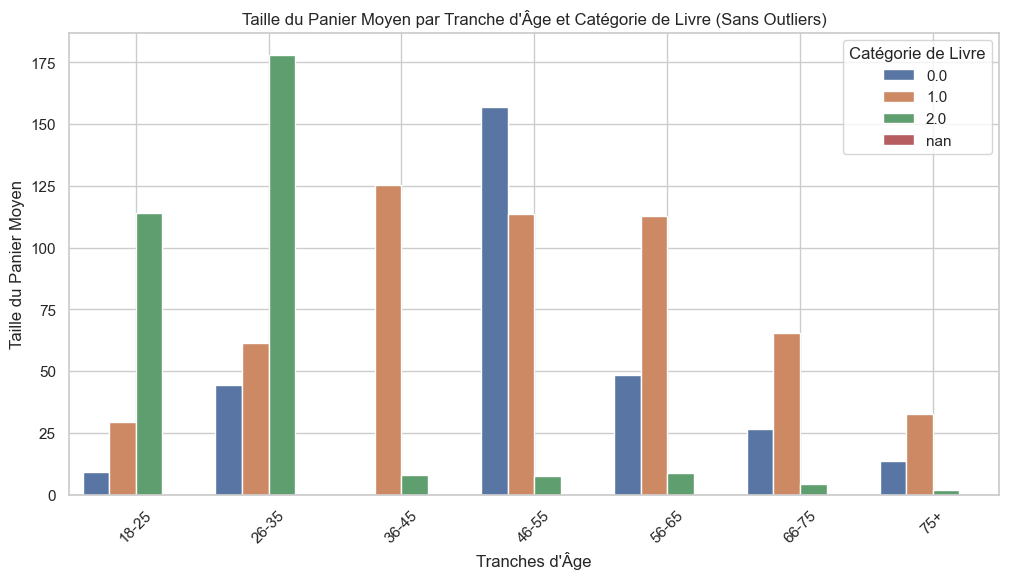

ANOVA : F = 0.58, p-value = 0.7419


In [105]:
# Vérifions que 'categ' est de type catégorie
transactions_with_products['categ'] = transactions_with_products['categ'].astype('str')

# Calculer le panier moyen par client
panier_moyen = transactions_with_products.groupby(['client_id', 'age_group', 'categ'])['price'].sum().reset_index()
panier_moyen = panier_moyen.groupby(['age_group', 'categ'])['price'].mean().reset_index()

# Renommer la colonne 'price' en 'panier_moyen'
panier_moyen.rename(columns={'price': 'panier_moyen'}, inplace=True)

# Vérifier les données et s'assurer qu'il n'y a pas de valeurs manquantes
print(panier_moyen.isnull().sum())

# Visualisation sans outliers
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='panier_moyen', hue='categ', data=panier_moyen)
plt.title("Taille du Panier Moyen par Tranche d'Âge et Catégorie de Livre (Avec Outliers)")
plt.xlabel("Tranches d'Âge")
plt.ylabel("Taille du Panier Moyen")
plt.xticks(rotation=45)
plt.legend(title='Catégorie de Livre')
plt.grid(True)
plt.show()

# Identification des outliers
Q1 = panier_moyen['panier_moyen'].quantile(0.25)
Q3 = panier_moyen['panier_moyen'].quantile(0.75)
IQR = Q3 - Q1

# Filtrer les outliers
panier_moyen_no_outliers = panier_moyen[(panier_moyen['panier_moyen'] >= (Q1 - 1.5 * IQR)) & (panier_moyen['panier_moyen'] <= (Q3 + 1.5 * IQR))]

# Visualisation avec outliers supprimés
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='panier_moyen', hue='categ', data=panier_moyen_no_outliers)
plt.title("Taille du Panier Moyen par Tranche d'Âge et Catégorie de Livre (Sans Outliers)")
plt.xlabel("Tranches d'Âge")
plt.ylabel("Taille du Panier Moyen")
plt.xticks(rotation=45)
plt.legend(title='Catégorie de Livre')
plt.grid(True)
plt.show()

# ANOVA : Test si la taille du panier moyen diffère significativement entre les tranches d'âge et catégories de livres
anova_result = f_oneway(
    *[panier_moyen_no_outliers[panier_moyen_no_outliers['age_group'] == group]['panier_moyen'] for group in panier_moyen_no_outliers['age_group'].unique()]
)

# Afficher les résultats de l'ANOVA
print(f"ANOVA : F = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")



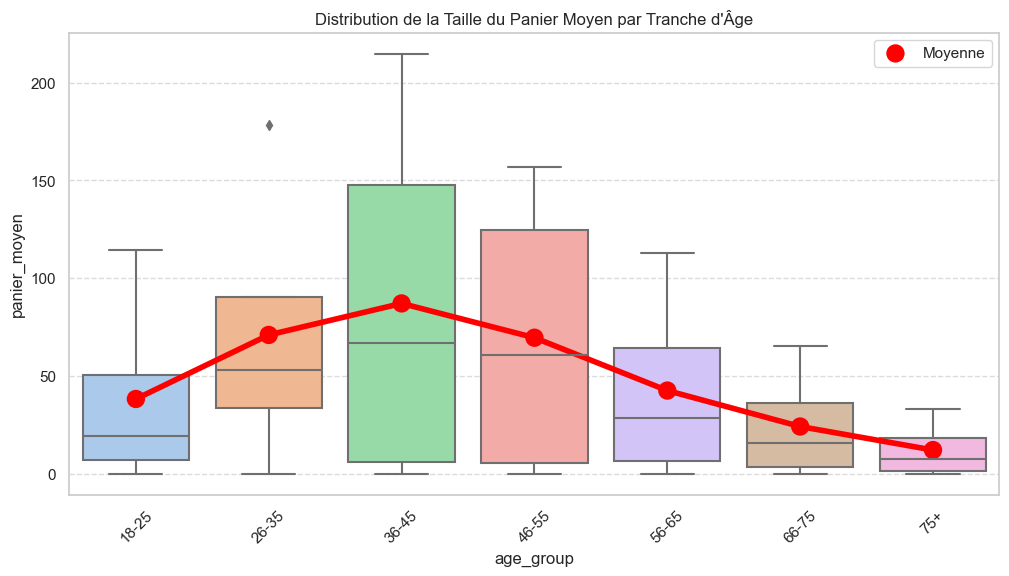

In [106]:
# Choisir une palette de couleurs
palette = sns.color_palette("pastel")

# Visualisation avec des boxplots améliorés
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='panier_moyen', data=panier_moyen, palette=palette)
plt.title("Distribution de la Taille du Panier Moyen par Tranche d'Âge")
plt.xlabel("Tranches d'Âge")
plt.ylabel("Taille du Panier Moyen")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Afficher la moyenne par tranche d'âge sans l'avertissement
means = panier_moyen.groupby('age_group')['panier_moyen'].mean().reset_index()
sns.pointplot(x='age_group', y='panier_moyen', data=means, color='red', markers='o', errorbar=None, label='Moyenne', scale=1.5)

plt.legend()
plt.show()


**ANNEXE 3**

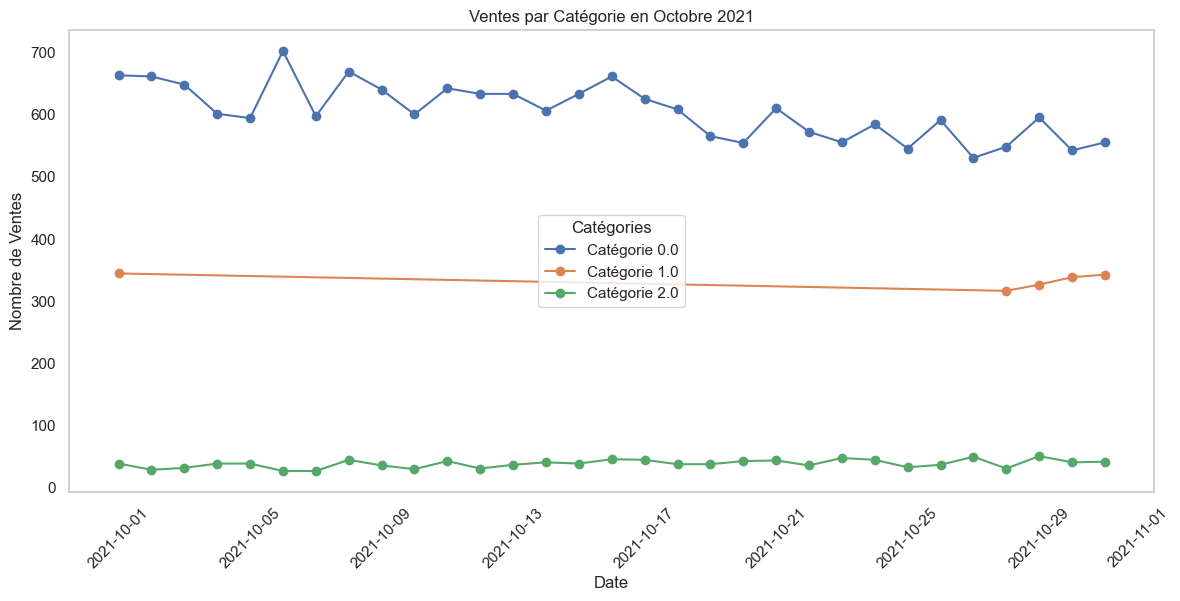

In [107]:


# Assurez-vous que la colonne 'date' est au format datetime
transactions_with_products['date'] = pd.to_datetime(transactions_with_products['date'])

# Filtrer pour le mois d'octobre 2021
october_2021_data = transactions_with_products[(transactions_with_products['date'].dt.month == 10) & 
                                               (transactions_with_products['date'].dt.year == 2021)]

# Filtrer uniquement les catégories d'intérêt
categories_of_interest = ['0.0', '1.0', '2.0']
october_filtered_data = october_2021_data[october_2021_data['categ'].isin(categories_of_interest)]

# Visualisation des ventes par catégorie
plt.figure(figsize=(14, 6))

for category in categories_of_interest:
    daily_sales = october_filtered_data[october_filtered_data['categ'] == category].groupby(october_filtered_data['date'].dt.date)['session_id'].count().reset_index(name='nombre_ventes')
    plt.plot(daily_sales['date'], daily_sales['nombre_ventes'], marker='o', label=f'Catégorie {category}')

plt.title("Ventes par Catégorie en Octobre 2021")
plt.xlabel("Date")
plt.ylabel("Nombre de Ventes")
plt.xticks(rotation=45)
plt.legend(title='Catégories')
plt.grid()
plt.show()

**ANNEXE 4**

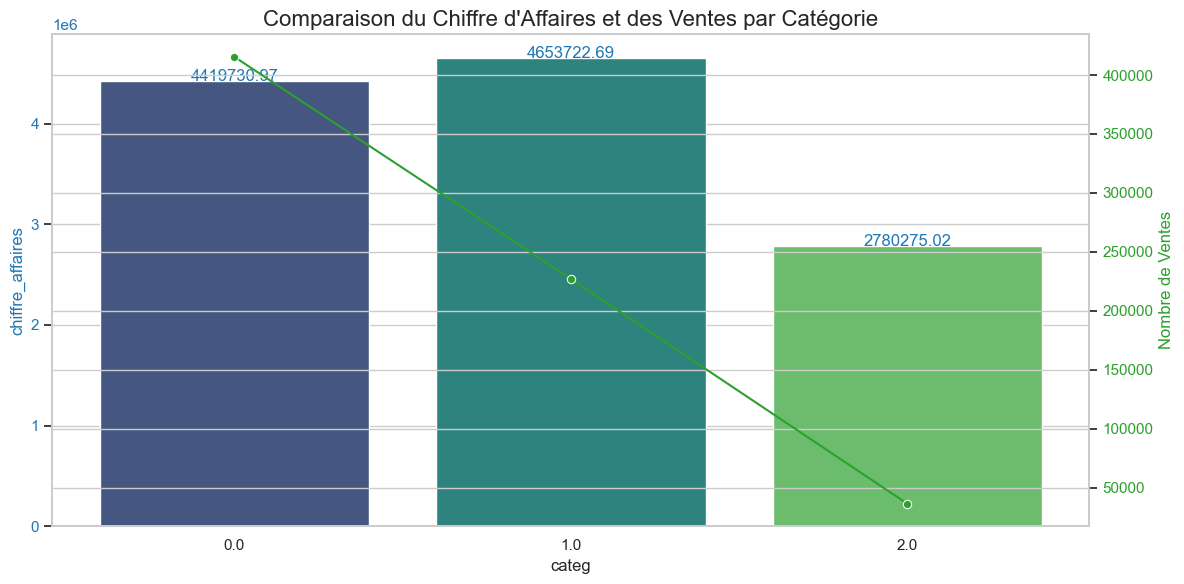

In [108]:
# Créer une figure et un axe
fig, ax1 = plt.subplots(figsize=(12, 6))

# Couleurs pour les deux axes
color1 = 'tab:blue'
color2 = 'tab:green'

# Plot 1: Chiffre d'affaires par catégorie (axe de gauche)
ax1.set_xlabel('Catégorie de Livre', fontsize=12)
ax1.set_ylabel('Chiffre d\'Affaires (en euros)', fontsize=12, color=color1)
sns.barplot(x='categ', y='chiffre_affaires', data=ca_par_categorie, palette='viridis', ax=ax1)
ax1.tick_params(axis='y', labelcolor=color1)

# Ajouter les valeurs exactes au-dessus des barres pour le chiffre d'affaires
for index, row in ca_par_categorie.iterrows():
    ax1.text(row.name, row.chiffre_affaires + 500, round(row.chiffre_affaires, 2), ha='center', color=color1)

# Plot 2: Nombre de ventes par catégorie (axe de droite)
ax2 = ax1.twinx()  # Instancier un deuxième axe qui partage le même axe x
ax2.set_ylabel('Nombre de Ventes', fontsize=12, color=color2)
sns.lineplot(x='categ', y='nombre_ventes', data=ventes_par_categorie, color=color2, marker='o', ax=ax2)
ax2.tick_params(axis='y', labelcolor=color2)

# Titre et layout
plt.title('Comparaison du Chiffre d\'Affaires et des Ventes par Catégorie', fontsize=16)
fig.tight_layout()  # Pour éviter que les labels ne se chevauchent

# Afficher le graphique
plt.show()


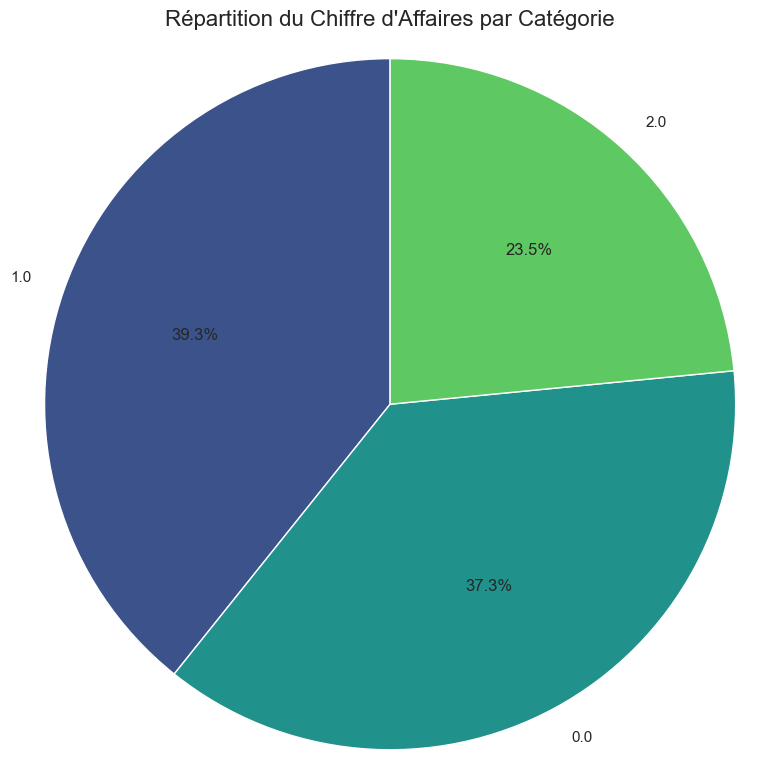

In [109]:
# Créer un Pie Chart pour la répartition du chiffre d'affaires par catégorie
plt.figure(figsize=(8, 8))
plt.pie(ca_par_categorie['chiffre_affaires'], labels=ca_par_categorie['categ'].astype(str), 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(ca_par_categorie)))

# Titre
plt.title('Répartition du Chiffre d\'Affaires par Catégorie', fontsize=16)

# Afficher le Pie Chart
plt.axis('equal')  # Assure que le graphique est un cercle
plt.tight_layout()
plt.show()
